In [1]:
import os
import pandas as pd
import re
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
matplotlib.font_manager._rebuild()
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup

from matplotlib import font_manager
font_manager._rebuild()
import nltk

# Table of Contents <br>
1. Beautful Soup <br>
2. Data Cleaning <br>
3. Text Preprocessing <br>
4. Sentiment Analysis: FRIENDS <br>
    a. Ross <br>
    b. Rachel <br>
    c. Chandler <br>
    d. Joey <br>
    e. Phoebe <br>
    f. Monica <br>
5. Polarity Visualization <br>
6. Topic Modeling <br>
    a. Latent Dirichlet Allocation <br>
    b. LDA Visualization <br>
    c. Non-Negative Matrix Factorization <br>
7. WordCloud <br>
    a. Ross <br>
    b. Rachel <br>
    c. Chandler <br>
    d. Joey <br>
    e. Phoebe <br>
    f. Monica <br>
8. Most Words Visual <br>

## 1. Beautful Soup

In [2]:
"""import requests
from bs4 import BeautifulSoup

BASE_URL = 'https://fangj.github.io/friends/'


def get_html_file(url):
    content = requests.get(BASE_URL+url).text
    soup = BeautifulSoup(content, "lxml")
    return soup.text


def save_season_script(season, episodes):
    i = 1
    for episode_url in episodes:
        content = get_html_file(episode_url)
        f = open("/Users/humzakhan/Metis/Metis_Projects/Metis_Project_4/dataset/{}.{}.txt".format(season, str(i)),
                 "w", encoding='utf-8')
        f.write(content)
        f.close()
        i += 1
        print("Created {}.{}.txt".format(season, i))


def get_episode_list():

    content = requests.get(BASE_URL).text
    soup = BeautifulSoup(content, "lxml")

    all_episode = [a['href'] for a in soup.find_all('a')]

    season1 = all_episode[0:24]
    save_season_script('1', season1)

    season2 = all_episode[24:47]
    save_season_script('2', season2)

    season3 = all_episode[47:72]
    save_season_script('3', season3)

    season4 = all_episode[72:95]
    save_season_script('4', season4)

    season5 = all_episode[95:118]
    save_season_script('5', season5)

    season6 = all_episode[118:141]
    save_season_script('6', season6)

    season7 = all_episode[141:164]
    save_season_script('7', season7)

    season8 = all_episode[165:188]
    save_season_script('8', season8)

    season9 = all_episode[188:211]
    save_season_script('9', season9)

    season10 = all_episode[211:]
    save_season_script('10', season10)

get_episode_list()"""

'import requests\nfrom bs4 import BeautifulSoup\n\nBASE_URL = \'https://fangj.github.io/friends/\'\n\n\ndef get_html_file(url):\n    content = requests.get(BASE_URL+url).text\n    soup = BeautifulSoup(content, "lxml")\n    return soup.text\n\n\ndef save_season_script(season, episodes):\n    i = 1\n    for episode_url in episodes:\n        content = get_html_file(episode_url)\n        f = open("/Users/humzakhan/Metis/Metis_Projects/Metis_Project_4/dataset/{}.{}.txt".format(season, str(i)),\n                 "w", encoding=\'utf-8\')\n        f.write(content)\n        f.close()\n        i += 1\n        print("Created {}.{}.txt".format(season, i))\n\n\ndef get_episode_list():\n\n    content = requests.get(BASE_URL).text\n    soup = BeautifulSoup(content, "lxml")\n\n    all_episode = [a[\'href\'] for a in soup.find_all(\'a\')]\n\n    season1 = all_episode[0:24]\n    save_season_script(\'1\', season1)\n\n    season2 = all_episode[24:47]\n    save_season_script(\'2\', season2)\n\n    season3 

In [3]:
BASE_URL = '/Users/humzakhan/Metis/Metis_Projects/Metis_Project_4/dataset/'

master_array = []

for filename in os.listdir(BASE_URL):
    
    f = open(BASE_URL+filename, "r", encoding='utf-8')
    
    split_name = filename.split('.') #obtain the season and episodes
    season = split_name[0]   
    episode = split_name[1]
    
    script = f.read() #read the script file
    pattern = re.compile(r'\s(?=\w+(?=:))') # store the regex
    result = re.split(pattern, script) # split the script where our pattern matched (pink dot)
    
    for item in result:
        split_line = item.split(':')
        try:
            character = split_line[0]
            speech = split_line[1]
            master_array.append([season, episode, character, speech])
        except:
            pass

## 2. Data Cleaning

In [4]:
df = pd.DataFrame(master_array, columns=['season', 'episode', 'char', 'line'])
df

,season,episode,char,line
0,6,16,by,Adam Chase\nStory
1,6,16,by,Zachary Rosenblatt\nTranscribed
2,6,16,by,Eric Aasen\n\n[Scene
3,6,16,Ross,"Hey, remember when I had a monkey?"
4,6,16,Chandler,Yeah.
...,...,...,...,...
61822,8,22,Monica,How did you know that?! (Runs to yell at Joey...
61823,8,22,Phoebe,Theyre at the coffeehouse.
61824,8,22,Monica,"You know everything!! Oh wait, double or noth..."
61825,8,22,Phoebe,We know its a girl! (Exits.)


In [5]:
#Feature counts

len(df['char'].unique())

800

In [6]:
len(df['season'].unique())

10

In [7]:
df['line'].shape

(61827,)

In [8]:
df = df[df.char != 'by']
df = df.reset_index(drop=True)
df['char'].unique()

array(['Ross', 'Chandler', 'Joey', 'Phoebe', 'Gunther', 'Rachel',
       'Monica', 'Receptionist', 'Carl', 'Doctor', 'Janice', 'Instructor',
       'Voice', 'Susan', 'Carol', 'Franzblau', 'Lydia', 'Nurse', 'All',
       'Guy', 'Janitor', 'From', '2', 'Long', 'guy', 'like', 'Erica',
       'Waiter', 'Sarah', 'Girl',
       "\n\nThe One With Phoebe's Husband\n\n\nThe One With Phoebe's Husband\n\n\nOriginally written by Alexa Junge\nTranscribed by Josh Hodge. \n\n\n\n[Scene",
       'RACHEL', 'STRANGER', 'JOEY', 'PHOEBE', 'MONICA', 'ROSS', 'ALL',
       'CHANDLER', 'JULIE', 'DUNCAN', 'RAHCEL', 'WOMAN', 'Chip', 'Tony',
       'Peter', 'Kathy', 'Waltham', 'Joshua', 'Attendant', 'note',
       'Girls', 'Croupler', 'Hitchhiker', 'Zane', 'Frank', 'Alice',
       'from', 'Joanna', 'Geller', 'Salesman', 'Oven', 'Sophie',
       '\n\nThe One With Five Steaks and an Eggplant\n\n\nThe One With Five Steaks and an Eggplant\n\n\nOriginally written by Chris Brown \nTranscribed by Mindy Mattingly Philli

In [9]:
df['char'].replace({'Chandler':'Chandler','CHANDLER':'Chandler', 'Chandlers':'Chandler', 'chandler': 'Chandler',
                    'Joey':'Joey', 'JOEY': 'Joey',
                    'Monica':'Monica','MONICA':'Monica', 'MOnica': 'Monica', 'MNCA': 'Monica',
                    'Phoebe':'Phoebe','PHOEBE':'Phoebe', 'Pheebs':'Phoebe', 'Pheebs':'Phoebe',
                    'Rachel':'Rachel','RACHEL':'Rachel', 'RACH':'Rachel', 'RAHCEL':'Rachel', 'Racel':'Rachel', 'Rache':'Rachel',
                    'Ross':'Ross', 'RUSS':'Ross', 'ROSS': 'Ross'}, inplace=True)

In [10]:
#(df['char'].value_counts())

In [11]:
#keep people with 10 or more lines

df = df[df['char'].map(df['char'].value_counts()) > 10]
len(df['char'].unique())

211

In [12]:
df['char'].unique()

array(['Ross', 'Chandler', 'Joey', 'Phoebe', 'Gunther', 'Rachel',
       'Monica', 'Receptionist', 'Doctor', 'Janice', 'Voice', 'Susan',
       'Carol', 'Franzblau', 'Lydia', 'Nurse', 'All', 'Guy', '2', 'Long',
       'guy', 'Erica', 'Waiter', 'Sarah', 'Girl', 'ALL', 'JULIE',
       'DUNCAN', 'Chip', 'Kathy', 'Waltham', 'Joshua', 'Attendant',
       'Frank', 'Alice', 'Joanna', 'Geller', 'Salesman', 'Sophie', 'JADE',
       'WAITER', 'Student', 'Date', 'Ethan', 'Elizabeth', 'Dana', 'Guys',
       'Note', 'Ben', 'Roger', 'Barry', 'Jack', 'Woman', 'Dina',
       'Teacher', 'Bobby', 'Styler', 'Mindy', 'CHAN', 'PHOE', 'MICH',
       'GUY', 'Bonnie', 'Ursula', 'Mike', 'Mark', 'Pete', 'Director',
       'Kate', 'Sr', 'Doug', '8', 'Employee', 'Russell', '1', 'STEPHANIE',
       'Mona', 'Jill', 'Janine', 'Heckles', 'Luisa', 'Both', 'Julie',
       'Man', 'Customer', 'Treeger', '3', 'Interviewer', 'Will', 'Lauren',
       'Emily', 'Green', 'Stripper', 'Amanda', 'TREEGER', 'Don', 'Vince',
       

In [13]:
#char = ['Chandler', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross']
#df = df[df['char'].isin(char)]

## 3. Text Preprocessing

In [14]:
# Text preprocessing steps - remove numbers, captial letters and punctuation

import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

df['line'] = df.line.map(alphanumeric).map(punc_lower)
df.head()

,season,episode,char,line
0,6,16,Ross,hey remember when i had a monkey
1,6,16,Chandler,yeah
2,6,16,Ross,yeah what what was i thinking
3,6,16,Joey,hes just picked up their bill hey so wha...
4,6,16,Chandler,twenty percent is a pretty generous tip joe


In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/humzakhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
stops = set(stopwords.words("english"))

new_stopwords = ['oh', 'yeah', 'il', 'uh', 'right', 'hi', 'okay', 'hey', 'i', 'me', 'my', 'myself', 'we', 
                 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 
                 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
                 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 
                 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 
                 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
                 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 
                 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 
                 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 
                 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
                 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 
                 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 
                 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 
                 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', 
                 "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 
                 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', 
                 "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'um', 'ok', 'umm', 'mr',
                 'would', 'ooh', 'ohh',
                 'her', 'during', 'among', 'thereafter', 'only', 'hers', 'in', 'none', 'with', 'un', 'put',
                 'hence', 'each', 'would', 'have', 'to', 'itself', 'that', 'seeming', 'hereupon', 'someone',
                 'eight', 'she', 'forty', 'much', 'throughout', 'less', 'was', 'interest', 'elsewhere', 
                 'already', 'whatever', 'or', 'seem', 'fire', 'however', 'keep', 'detail', 'both', 'yourselves', 
                 'indeed', 'enough', 'too', 'us', 'wherein', 'himself', 'behind', 'everything', 'part', 'made', 
                 'thereupon', 'for', 'nor', 'before', 'front', 'sincere', 'really', 'than', 'alone', 'doing',
                 'amongst', 'across', 'him', 'another', 'some', 'whoever', 'four', 'other', 'latterly', 'off',
                 'sometime', 'above', 'often', 'herein', 'am', 'whereby', 'although', 'who', 'should', 'amount',
                 'anyway', 'else', 'upon', 'this', 'when', 'we', 'few', 'anywhere', 'will', 'though', 'being', 
                 'fill', 'used', 'full', 'thru', 'call', 'whereafter', 'various', 'has', 'same', 'former', 
                 'whereas', 'what', 'had', 'mostly', 'onto', 'go', 'could', 'yourself', 'meanwhile', 'beyond', 
                 'beside', 'ours', 'side', 'our', 'five', 'nobody', 'herself', 'is', 'ever', 'they', 'here', 
                 'eleven', 'fifty', 'therefore', 'nothing', 'not', 'mill', 'without', 'whence', 'get', 'whither',
                 'then', 'no', 'own', 'many', 'anything', 'etc', 'make', 'from', 'against', 'ltd',
                 'next', 'afterwards', 'unless', 'while', 'thin', 'beforehand', 'by', 'amoungst', 'you', 
                 'third', 'as', 'those', 'done', 'becoming', 'say', 'either', 'doesn', 'twenty', 'his', 
                 'yet', 'latter', 'somehow', 'are', 'these', 'mine', 'under', 'take', 'whose', 'others', 
                 'over', 'perhaps', 'thence', 'does', 'where', 'two', 'always', 'your', 'wherever', 'became',
                 'which', 'about', 'but', 'towards', 'still', 'rather', 'quite', 'whether', 'somewhere', 
                 'might', 'do', 'bottom', 'until', 'km', 'yours', 'serious', 'find', 'please', 'hasnt', 
                 'otherwise', 'six', 'toward', 'sometimes', 'of', 'fifteen', 'eg', 'just', 'a', 'me', 
                 'describe', 'why', 'an', 'and', 'may', 'within', 'kg', 'con', 're', 'nevertheless', 
                 'through', 'very', 'anyhow', 'down', 'nowhere', 'now', 'it', 'cant', 'de', 'move', 
                 'hereby', 'how', 'found', 'whom', 'were', 'together', 'again', 'moreover', 'first', 
                 'never', 'below', 'between', 'computer', 'ten', 'into', 'see', 'everywhere', 'there', 
                 'neither', 'every', 'couldnt', 'up', 'several', 'the', 'i', 'becomes', 'don', 'ie', 
                 'been', 'whereupon', 'seemed', 'most', 'noone', 'whole', 'must', 'cannot', 'per', 'my', 
                 'thereby', 'so', 'he', 'name', 'co', 'its', 'everyone', 'if', 'become', 'thick', 'thus', 
                 'regarding', 'didn', 'give', 'all', 'show', 'any', 'using', 'on', 'further', 'around', 
                 'back', 'least', 'since', 'anyone', 'once', 'can', 'bill', 'hereafter', 'be', 'seems', 
                 'their', 'myself', 'nine', 'also', 'system', 'at', 'more', 'out', 'twelve', 'therein', 
                 'almost', 'except', 'last', 'did', 'something', 'besides', 'via', 'whenever', 'formerly', 
                 'cry', 'one', 'hundred', 'sixty', 'after', 'well', 'them', 'namely', 'empty', 'three', 
                 'even', 'along', 'because', 'ourselves', 'such', 'top', 'due', 'inc', 'themselves''s', 
                 'scene', 're', 't',
                'whence', 'here', 'show', 'were', 'why', 'n’t', 'the', 'whereupon', 'not', 'more', 'how', 
                 'eight', 'indeed', 'i', 'only', 'via', 'nine', 're', 'themselves', 'almost', 'to', 
                 'already', 'front', 'least', 'becomes', 'thereby', 'doing', 'her', 'together', 'be', 
                 'often', 'then', 'quite', 'less', 'many', 'they', 'ourselves', 'take', 'its', 'yours', 
                 'each', 'would', 'may', 'namely', 'do', 'whose', 'whether', 'side', 'both', 'what', 
                 'between', 'toward', 'our', 'whereby', "'m", 'formerly', 'myself', 'had', 'really', 
                 'call', 'keep', "'re", 'hereupon', 'can', 'their', 'eleven', '’m', 'even', 'around', 
                 'twenty', 'mostly', 'did', 'at', 'an', 'seems', 'serious', 'against', "n't", 'except', 
                 'has', 'five', 'he', 'last', '‘ve', 'because', 'we', 'himself', 'yet', 'something', 
                 'somehow', '‘m', 'towards', 'his', 'six', 'anywhere', 'us', '‘d', 'thru', 'thus', 
                 'which', 'everything', 'become', 'herein', 'one', 'in', 'although', 'sometime', 
                 'give', 'cannot', 'besides', 'across', 'noone', 'ever', 'that', 'over', 'among', 
                 'during', 'however', 'when', 'sometimes', 'still', 'seemed', 'get', "'ve", 'him',
                 'with', 'part', 'beyond', 'everyone', 'same', 'this', 'latterly', 'no', 'regarding', 
                 'elsewhere', 'others', 'moreover', 'else', 'back', 'alone', 'somewhere', 'are', 'will', 
                 'beforehand', 'ten', 'very', 'most', 'three', 'former', '’re', 'otherwise', 'several', 
                 'also', 'whatever', 'am', 'becoming', 'beside', '’s', 'nothing', 'some', 'since', 'thence', 
                 'anyway', 'out', 'up', 'well', 'it', 'various', 'four', 'top', '‘s', 'than', 'under', 
                 'might', 'could', 'by', 'too', 'and', 'whom', '‘ll', 'say', 'therefore', "'s", 'other', 
                 'throughout', 'became', 'your', 'put', 'per', "'ll", 'fifteen', 'must', 'before', 
                 'whenever', 'anyone', 'without', 'does', 'was', 'where', 'thereafter', "'d", 'another', 
                 'yourselves', 'n‘t', 'see', 'go', 'wherever', 'just', 'seeming', 'hence', 'full', 
                 'whereafter', 'bottom', 'whole', 'own', 'empty', 'due', 'behind', 'while', 'onto', 
                 'wherein', 'off', 'again', 'a', 'two', 'above', 'therein', 'sixty', 'those', 'whereas', 
                 'using', 'latter', 'used', 'my', 'herself', 'hers', 'or', 'neither', 'forty', 'thereupon', 
                 'now', 'after', 'yourself', 'whither', 'rather', 'once', 'from', 'until', 'anything', 'few',
                 'into', 'such', 'being', 'make', 'mine', 'please', 'along', 'hundred', 'should', 'below', 
                 'third', 'unless', 'upon', 'perhaps', 'ours', 'but', 'never', 'whoever', 'fifty', 'any', 
                 'all', 'nobody', 'there', 'have', 'anyhow', 'of', 'seem', 'down', 'is', 'every', '’ll', 
                 'much', 'none', 'further', 'me', 'who', 'nevertheless', 'about', 'everywhere', 'name', 
                 'enough', '’d', 'next', 'meanwhile', 'though', 'through', 'on', 'first', 'been', 'hereby',
                 'if', 'move', 'so', 'either', 'amongst', 'for', 'twelve', 'nor', 'she', 'always', 'these',
                 'as', '’ve', 'amount', '‘re', 'someone', 'afterwards', 'you', 'nowhere', 'itself', 'done', 
                 'hereafter', 'within', 'made', 'ca', 'them']

def remove_stops(row):
    my_list = df['line'].to_string()
    meaningful_words = [w for w in my_list if not w in new_stopwords]
    return(meaningful_words)

In [18]:
l = []
for s in list(df['line'].str.split()):
    l.append(' '.join([w for w in s if w not in new_stopwords]))
    
#create new column new_lines
df['new_lines'] = l

df.head()

,season,episode,char,line,new_lines
0,6,16,Ross,hey remember when i had a monkey,remember monkey
1,6,16,Chandler,yeah,
2,6,16,Ross,yeah what what was i thinking,thinking
3,6,16,Joey,hes just picked up their bill hey so wha...,hes picked whats percent tip wrong
4,6,16,Chandler,twenty percent is a pretty generous tip joe,percent pretty generous tip joe


## 4. Sentiment Analysis: FRIENDS

In [19]:
from textblob import TextBlob

In [20]:
def sentiment_analysis(char_df):
    
    pol = []
    sub = []
    for new_lines in char_df.new_lines:
        sentp = TextBlob(new_lines).sentiment.polarity
        sents = TextBlob(new_lines).sentiment.subjectivity
        pol.append(sentp)
        sub.append(sents)
        
    sentdf = pd.DataFrame()
    sentdf['polarity'] = pol
    sentdf['subjectivity'] = sub
    
    char_df['Polarity'] = sentdf.polarity
    char_df['Subjectivity'] = sentdf.subjectivity
    
    return char_df

In [21]:
df = df.reset_index(drop=True)

In [22]:
sentiment_analysis(df)

,season,episode,char,line,new_lines,Polarity,Subjectivity
0,6,16,Ross,hey remember when i had a monkey,remember monkey,-0.050000,0.000000
1,6,16,Chandler,yeah,,0.000000,0.000000
2,6,16,Ross,yeah what what was i thinking,thinking,0.000000,0.000000
3,6,16,Joey,hes just picked up their bill hey so wha...,hes picked whats percent tip wrong,-0.500000,0.900000
4,6,16,Chandler,twenty percent is a pretty generous tip joe,percent pretty generous tip joe,0.250000,1.000000
...,...,...,...,...,...,...,...
59587,8,22,Monica,how did you know that runs to yell at joey...,know runs yell joeys apartment joey chandler ...,0.000000,0.000000
59588,8,22,Phoebe,theyre at the coffeehouse,theyre coffeehouse,0.000000,0.000000
59589,8,22,Monica,you know everything oh wait double or noth...,know wait double bet baby seven pounds phoebe ...,0.166667,0.333333
59590,8,22,Phoebe,we know its a girl exits,know its girl exits,0.000000,0.000000


In [23]:
pos = [ new_lines for index, new_lines in enumerate(list(df['new_lines'])) if list(df['Polarity'])[index] > 0]
neu = [ new_lines for index, new_lines in enumerate(list(df['new_lines'])) if list(df['Polarity'])[index] == 0]
neg = [ new_lines for index, new_lines in enumerate(list(df['new_lines'])) if list(df['Polarity'])[index] < 0]

In [24]:
print("Percentage of positive lines: {}%".format(len(pos)*100/len(df)))
print("Percentage of neutral lines: {}%".format(len(neu)*100/len(df)))
print("Percentage of negative lines: {}%".format(len(neg)*100/len(df)))

Percentage of positive lines: 23.227950060410794%
Percentage of neutral lines: 62.19962411061888%
Percentage of negative lines: 14.572425828970331%


In [25]:
def func(x):
    if x<0:
        return 'negative'
    elif x>0:
        return 'positive'
    else:
        return 'neutral'
    i

In [26]:
df['sentiment']=df['Polarity'].apply(func)

In [27]:
df

,season,episode,char,line,new_lines,Polarity,Subjectivity,sentiment
0,6,16,Ross,hey remember when i had a monkey,remember monkey,-0.050000,0.000000,negative
1,6,16,Chandler,yeah,,0.000000,0.000000,neutral
2,6,16,Ross,yeah what what was i thinking,thinking,0.000000,0.000000,neutral
3,6,16,Joey,hes just picked up their bill hey so wha...,hes picked whats percent tip wrong,-0.500000,0.900000,negative
4,6,16,Chandler,twenty percent is a pretty generous tip joe,percent pretty generous tip joe,0.250000,1.000000,positive
...,...,...,...,...,...,...,...,...
59587,8,22,Monica,how did you know that runs to yell at joey...,know runs yell joeys apartment joey chandler ...,0.000000,0.000000,neutral
59588,8,22,Phoebe,theyre at the coffeehouse,theyre coffeehouse,0.000000,0.000000,neutral
59589,8,22,Monica,you know everything oh wait double or noth...,know wait double bet baby seven pounds phoebe ...,0.166667,0.333333,positive
59590,8,22,Phoebe,we know its a girl exits,know its girl exits,0.000000,0.000000,neutral


In [28]:
df.groupby(['sentiment']).count()

,season,episode,char,line,new_lines,Polarity,Subjectivity
sentiment,,,,,,,
negative,8684,8684,8684,8684,8684,8684,8684
neutral,37066,37066,37066,37066,37066,37066,37066
positive,13842,13842,13842,13842,13842,13842,13842


### 4a. Sentiment Analysis: ROSS

In [29]:
from textblob import TextBlob

In [30]:
df.char.unique()

array(['Ross', 'Chandler', 'Joey', 'Phoebe', 'Gunther', 'Rachel',
       'Monica', 'Receptionist', 'Doctor', 'Janice', 'Voice', 'Susan',
       'Carol', 'Franzblau', 'Lydia', 'Nurse', 'All', 'Guy', '2', 'Long',
       'guy', 'Erica', 'Waiter', 'Sarah', 'Girl', 'ALL', 'JULIE',
       'DUNCAN', 'Chip', 'Kathy', 'Waltham', 'Joshua', 'Attendant',
       'Frank', 'Alice', 'Joanna', 'Geller', 'Salesman', 'Sophie', 'JADE',
       'WAITER', 'Student', 'Date', 'Ethan', 'Elizabeth', 'Dana', 'Guys',
       'Note', 'Ben', 'Roger', 'Barry', 'Jack', 'Woman', 'Dina',
       'Teacher', 'Bobby', 'Styler', 'Mindy', 'CHAN', 'PHOE', 'MICH',
       'GUY', 'Bonnie', 'Ursula', 'Mike', 'Mark', 'Pete', 'Director',
       'Kate', 'Sr', 'Doug', '8', 'Employee', 'Russell', '1', 'STEPHANIE',
       'Mona', 'Jill', 'Janine', 'Heckles', 'Luisa', 'Both', 'Julie',
       'Man', 'Customer', 'Treeger', '3', 'Interviewer', 'Will', 'Lauren',
       'Emily', 'Green', 'Stripper', 'Amanda', 'TREEGER', 'Don', 'Vince',
       

In [31]:
ROSS = df[df['char'] == 'Ross']
ROSS = ROSS.reset_index(drop=True)

In [32]:
ROSS.head(10)

,season,episode,char,line,new_lines,Polarity,Subjectivity,sentiment
0,6,16,Ross,hey remember when i had a monkey,remember monkey,-0.050000,0.000000,negative
1,6,16,Ross,yeah what what was i thinking,thinking,0.000000,0.000000,neutral
2,6,16,Ross,whats up with the greed joe,whats greed joe,0.000000,0.000000,neutral
3,6,16,Ross,well isnt there something you can do to earn...,isnt earn little extra money mean cant cant...,-0.125000,0.346875,negative
4,6,16,Ross,oh wait wait dont you have an audition to...,wait wait dont audition today maybe youll job,0.000000,0.000000,neutral
5,6,16,Ross,hi,,0.000000,0.000000,neutral
6,6,16,Ross,hey what have you guys been up to,guys,0.000000,0.000000,neutral
7,6,16,Ross,wow,wow,0.100000,1.000000,positive
8,6,16,Ross,after one class i dont think so,class dont think,0.000000,0.000000,neutral
9,6,16,Ross,well of course you can defend yourself from ...,course defend attack know coming thats look s...,0.108333,0.300000,positive


In [33]:
ROSS['sentiment']=ROSS['Polarity'].apply(func)

In [34]:
pos = [ new_lines for index, new_lines in enumerate(list(ROSS['new_lines'])) if list(ROSS['Polarity'])[index] > 0]
neu = [ new_lines for index, new_lines in enumerate(list(ROSS['new_lines'])) if list(ROSS['Polarity'])[index] == 0]
neg = [ new_lines for index, new_lines in enumerate(list(ROSS['new_lines'])) if list(ROSS['Polarity'])[index] < 0]

In [35]:
print("Percentage of positive lines: {}%".format(len(pos)*100/len(ROSS)))
print("Percentage of neutral lines: {}%".format(len(neu)*100/len(ROSS)))
print("Percentage of negative lines: {}%".format(len(neg)*100/len(ROSS)))

Percentage of positive lines: 23.15119596225587%
Percentage of neutral lines: 62.14614878209348%
Percentage of negative lines: 14.702655255650647%


In [36]:
ROSS.groupby(['sentiment']).count()

,season,episode,char,line,new_lines,Polarity,Subjectivity
sentiment,,,,,,,
negative,1340,1340,1340,1340,1340,1340,1340
neutral,5664,5664,5664,5664,5664,5664,5664
positive,2110,2110,2110,2110,2110,2110,2110


### 4b. Sentiment Analysis: Rachel

In [37]:
df.char.unique()

array(['Ross', 'Chandler', 'Joey', 'Phoebe', 'Gunther', 'Rachel',
       'Monica', 'Receptionist', 'Doctor', 'Janice', 'Voice', 'Susan',
       'Carol', 'Franzblau', 'Lydia', 'Nurse', 'All', 'Guy', '2', 'Long',
       'guy', 'Erica', 'Waiter', 'Sarah', 'Girl', 'ALL', 'JULIE',
       'DUNCAN', 'Chip', 'Kathy', 'Waltham', 'Joshua', 'Attendant',
       'Frank', 'Alice', 'Joanna', 'Geller', 'Salesman', 'Sophie', 'JADE',
       'WAITER', 'Student', 'Date', 'Ethan', 'Elizabeth', 'Dana', 'Guys',
       'Note', 'Ben', 'Roger', 'Barry', 'Jack', 'Woman', 'Dina',
       'Teacher', 'Bobby', 'Styler', 'Mindy', 'CHAN', 'PHOE', 'MICH',
       'GUY', 'Bonnie', 'Ursula', 'Mike', 'Mark', 'Pete', 'Director',
       'Kate', 'Sr', 'Doug', '8', 'Employee', 'Russell', '1', 'STEPHANIE',
       'Mona', 'Jill', 'Janine', 'Heckles', 'Luisa', 'Both', 'Julie',
       'Man', 'Customer', 'Treeger', '3', 'Interviewer', 'Will', 'Lauren',
       'Emily', 'Green', 'Stripper', 'Amanda', 'TREEGER', 'Don', 'Vince',
       

In [38]:
RACHEL = df[df['char'] == 'Rachel']
RACHEL = RACHEL.reset_index(drop=True)

In [39]:
RACHEL.head(10)

,season,episode,char,line,new_lines,Polarity,Subjectivity,sentiment
0,6,16,Rachel,yeah kicking a guy in the crotch all morning...,kicking guy crotch morning takes ya,0.000000,0.000000,neutral
1,6,16,Rachel,yeah,,0.000000,0.000000,neutral
2,6,16,Rachel,what you wanna see me self defend myself g...,wanna self defend points pretend youre sexual...,0.500000,0.833333,positive
3,6,16,Rachel,isnt that a kind of sushi,isnt kind sushi,0.600000,0.900000,positive
4,6,16,Rachel,ohh i would kill for a salmon skin roll righ...,kill salmon skin roll,0.000000,0.000000,neutral
5,6,16,Rachel,to phoebe ooh yknow what if we made rese...,phoebe yknow reservations unagi half hour,-0.166667,0.166667,negative
6,6,16,Rachel,well valentines day was like two weeks ago ...,valentines day like weeks ago wouldnt calendar,0.000000,0.000000,neutral
7,6,16,Rachel,aw i love that,aw love,0.500000,0.600000,positive
8,6,16,Rachel,interrupting him okay okay okay so making...,interrupting making things sounds like fun,0.300000,0.200000,positive
9,6,16,Rachel,hey wait a minute that is my sock,wait minute sock,0.000000,0.000000,neutral


In [40]:
pos = [ new_lines for index, new_lines in enumerate(list(RACHEL['new_lines'])) if list(RACHEL['Polarity'])[index] > 0]
neu = [ new_lines for index, new_lines in enumerate(list(RACHEL['new_lines'])) if list(RACHEL['Polarity'])[index] == 0]
neg = [ new_lines for index, new_lines in enumerate(list(RACHEL['new_lines'])) if list(RACHEL['Polarity'])[index] < 0]

In [41]:
print("Percentage of positive lines: {}%".format(len(pos)*100/len(RACHEL)))
print("Percentage of neutral lines: {}%".format(len(neu)*100/len(RACHEL)))
print("Percentage of negative lines: {}%".format(len(neg)*100/len(RACHEL)))

Percentage of positive lines: 22.53808195666166%
Percentage of neutral lines: 62.27204462561682%
Percentage of negative lines: 15.189873417721518%


In [42]:
RACHEL.groupby(['sentiment']).count()

,season,episode,char,line,new_lines,Polarity,Subjectivity
sentiment,,,,,,,
negative,1416,1416,1416,1416,1416,1416,1416
neutral,5805,5805,5805,5805,5805,5805,5805
positive,2101,2101,2101,2101,2101,2101,2101


### 4c. Sentiment Analysis: Chandler

In [43]:
df.char.unique()

array(['Ross', 'Chandler', 'Joey', 'Phoebe', 'Gunther', 'Rachel',
       'Monica', 'Receptionist', 'Doctor', 'Janice', 'Voice', 'Susan',
       'Carol', 'Franzblau', 'Lydia', 'Nurse', 'All', 'Guy', '2', 'Long',
       'guy', 'Erica', 'Waiter', 'Sarah', 'Girl', 'ALL', 'JULIE',
       'DUNCAN', 'Chip', 'Kathy', 'Waltham', 'Joshua', 'Attendant',
       'Frank', 'Alice', 'Joanna', 'Geller', 'Salesman', 'Sophie', 'JADE',
       'WAITER', 'Student', 'Date', 'Ethan', 'Elizabeth', 'Dana', 'Guys',
       'Note', 'Ben', 'Roger', 'Barry', 'Jack', 'Woman', 'Dina',
       'Teacher', 'Bobby', 'Styler', 'Mindy', 'CHAN', 'PHOE', 'MICH',
       'GUY', 'Bonnie', 'Ursula', 'Mike', 'Mark', 'Pete', 'Director',
       'Kate', 'Sr', 'Doug', '8', 'Employee', 'Russell', '1', 'STEPHANIE',
       'Mona', 'Jill', 'Janine', 'Heckles', 'Luisa', 'Both', 'Julie',
       'Man', 'Customer', 'Treeger', '3', 'Interviewer', 'Will', 'Lauren',
       'Emily', 'Green', 'Stripper', 'Amanda', 'TREEGER', 'Don', 'Vince',
       

In [44]:
CHANDLER = df[df['char'] == 'Chandler']
CHANDLER = CHANDLER.reset_index(drop=True)

In [45]:
CHANDLER.head(10)

,season,episode,char,line,new_lines,Polarity,Subjectivity,sentiment
0,6,16,Chandler,yeah,,0.000000,0.000000,neutral
1,6,16,Chandler,twenty percent is a pretty generous tip joe,percent pretty generous tip joe,0.250000,1.000000,positive
2,6,16,Chandler,i see where youre goin,youre goin,0.000000,0.000000,neutral
3,6,16,Chandler,reminiscing ah finally an explanation,reminiscing ah finally explanation,0.000000,1.000000,neutral
4,6,16,Chandler,hey hey is monica here,monica,0.000000,0.000000,neutral
5,6,16,Chandler,okay look i need your help i dont know wha...,look need help dont know valentines day,0.000000,0.000000,neutral
6,6,16,Chandler,laughs she was working on valentines day s...,laughs working valentines day were celebrati...,0.000000,0.000000,neutral
7,6,16,Chandler,well appealing as that does sound to her boyf...,appealing sound boyfriend pause brother camera...,-0.033333,0.633333,negative
8,6,16,Chandler,yeah i thought so to until i paper mached on...,thought paper mached eyes shut,0.000000,0.000000,neutral
9,6,16,Chandler,i made a does one of those gibberish words,gibberish words,0.000000,0.000000,neutral


In [46]:
pos = [ new_lines for index, new_lines in enumerate(list(CHANDLER['new_lines'])) if list(CHANDLER['Polarity'])[index] > 0]
neu = [ new_lines for index, new_lines in enumerate(list(CHANDLER['new_lines'])) if list(CHANDLER['Polarity'])[index] == 0]
neg = [ new_lines for index, new_lines in enumerate(list(CHANDLER['new_lines'])) if list(CHANDLER['Polarity'])[index] < 0]

In [47]:
print("Percentage of positive lines: {}%".format(len(pos)*100/len(CHANDLER)))
print("Percentage of neutral lines: {}%".format(len(neu)*100/len(CHANDLER)))
print("Percentage of negative lines: {}%".format(len(neg)*100/len(CHANDLER)))

Percentage of positive lines: 22.817270992366414%
Percentage of neutral lines: 62.71469465648855%
Percentage of negative lines: 14.468034351145038%


In [48]:
CHANDLER.groupby(['sentiment']).count()

,season,episode,char,line,new_lines,Polarity,Subjectivity
sentiment,,,,,,,
negative,1213,1213,1213,1213,1213,1213,1213
neutral,5258,5258,5258,5258,5258,5258,5258
positive,1913,1913,1913,1913,1913,1913,1913


### 4d. Sentiment Analysis: Joey

In [49]:
df.char.unique()

array(['Ross', 'Chandler', 'Joey', 'Phoebe', 'Gunther', 'Rachel',
       'Monica', 'Receptionist', 'Doctor', 'Janice', 'Voice', 'Susan',
       'Carol', 'Franzblau', 'Lydia', 'Nurse', 'All', 'Guy', '2', 'Long',
       'guy', 'Erica', 'Waiter', 'Sarah', 'Girl', 'ALL', 'JULIE',
       'DUNCAN', 'Chip', 'Kathy', 'Waltham', 'Joshua', 'Attendant',
       'Frank', 'Alice', 'Joanna', 'Geller', 'Salesman', 'Sophie', 'JADE',
       'WAITER', 'Student', 'Date', 'Ethan', 'Elizabeth', 'Dana', 'Guys',
       'Note', 'Ben', 'Roger', 'Barry', 'Jack', 'Woman', 'Dina',
       'Teacher', 'Bobby', 'Styler', 'Mindy', 'CHAN', 'PHOE', 'MICH',
       'GUY', 'Bonnie', 'Ursula', 'Mike', 'Mark', 'Pete', 'Director',
       'Kate', 'Sr', 'Doug', '8', 'Employee', 'Russell', '1', 'STEPHANIE',
       'Mona', 'Jill', 'Janine', 'Heckles', 'Luisa', 'Both', 'Julie',
       'Man', 'Customer', 'Treeger', '3', 'Interviewer', 'Will', 'Lauren',
       'Emily', 'Green', 'Stripper', 'Amanda', 'TREEGER', 'Don', 'Vince',
       

In [50]:
JOEY = df[df['char'] == 'Joey']
JOEY = JOEY.reset_index(drop=True)

In [51]:
JOEY.head(10)

,season,episode,char,line,new_lines,Polarity,Subjectivity,sentiment
0,6,16,Joey,hes just picked up their bill hey so wha...,hes picked whats percent tip wrong,-0.500000,0.900000,negative
1,6,16,Joey,yknow whats more generous than that fifty...,yknow whats generous percent yknow whats g...,0.000000,0.000000,neutral
2,6,16,Joey,all right look im sorry you guys but its ...,look im sorry guys its gotta new head shots ...,-0.215909,0.563636,negative
3,6,16,Joey,oh ha ha ha ooh wait a minute i used to g...,ha ha ha wait minute medical experiments time,0.000000,0.000000,neutral
4,6,16,Joey,no no i used to get paid for all kinds of me...,paid kinds medical stuff remember lets dont ...,0.000000,0.000000,neutral
5,6,16,Joey,yeah,,0.000000,0.000000,neutral
6,6,16,Joey,uhh do it,uhh,0.000000,0.000000,neutral
7,6,16,Joey,well where was i takes a sip of the coffee...,takes sip coffee opening credits,0.000000,0.000000,neutral
8,6,16,Joey,takes it out of you laughs,takes laughs,0.000000,0.000000,neutral
9,6,16,Joey,ohh hey why dont you book a date for both ...,dont book date romantic spas,0.000000,0.500000,neutral


In [52]:
pos = [ new_lines for index, new_lines in enumerate(list(JOEY['new_lines'])) if list(JOEY['Polarity'])[index] > 0]
neu = [ new_lines for index, new_lines in enumerate(list(JOEY['new_lines'])) if list(JOEY['Polarity'])[index] == 0]
neg = [ new_lines for index, new_lines in enumerate(list(JOEY['new_lines'])) if list(JOEY['Polarity'])[index] < 0]

In [53]:
print("Percentage of positive lines: {}%".format(len(pos)*100/len(JOEY)))
print("Percentage of neutral lines: {}%".format(len(neu)*100/len(JOEY)))
print("Percentage of negative lines: {}%".format(len(neg)*100/len(JOEY)))

Percentage of positive lines: 23.346303501945524%
Percentage of neutral lines: 62.34192607003891%
Percentage of negative lines: 14.311770428015564%


In [54]:
JOEY.groupby(['sentiment']).count()

,season,episode,char,line,new_lines,Polarity,Subjectivity
sentiment,,,,,,,
negative,1177,1177,1177,1177,1177,1177,1177
neutral,5127,5127,5127,5127,5127,5127,5127
positive,1920,1920,1920,1920,1920,1920,1920


### 4e. Sentiment Analysis: Phoebe

In [55]:
df.char.unique()

array(['Ross', 'Chandler', 'Joey', 'Phoebe', 'Gunther', 'Rachel',
       'Monica', 'Receptionist', 'Doctor', 'Janice', 'Voice', 'Susan',
       'Carol', 'Franzblau', 'Lydia', 'Nurse', 'All', 'Guy', '2', 'Long',
       'guy', 'Erica', 'Waiter', 'Sarah', 'Girl', 'ALL', 'JULIE',
       'DUNCAN', 'Chip', 'Kathy', 'Waltham', 'Joshua', 'Attendant',
       'Frank', 'Alice', 'Joanna', 'Geller', 'Salesman', 'Sophie', 'JADE',
       'WAITER', 'Student', 'Date', 'Ethan', 'Elizabeth', 'Dana', 'Guys',
       'Note', 'Ben', 'Roger', 'Barry', 'Jack', 'Woman', 'Dina',
       'Teacher', 'Bobby', 'Styler', 'Mindy', 'CHAN', 'PHOE', 'MICH',
       'GUY', 'Bonnie', 'Ursula', 'Mike', 'Mark', 'Pete', 'Director',
       'Kate', 'Sr', 'Doug', '8', 'Employee', 'Russell', '1', 'STEPHANIE',
       'Mona', 'Jill', 'Janine', 'Heckles', 'Luisa', 'Both', 'Julie',
       'Man', 'Customer', 'Treeger', '3', 'Interviewer', 'Will', 'Lauren',
       'Emily', 'Green', 'Stripper', 'Amanda', 'TREEGER', 'Don', 'Vince',
       

In [56]:
PHOEBE = df[df['char'] == 'Phoebe']
PHOEBE = PHOEBE.reset_index(drop=True)

In [57]:
PHOEBE.head(10)

,season,episode,char,line,new_lines,Polarity,Subjectivity,sentiment
0,6,16,Phoebe,or yknow i used to beg for money of cours...,yknow beg money course helps youve got ykno...,-0.04375,0.7500,negative
1,6,16,Phoebe,hey,,0.00000,0.0000,neutral
2,6,16,Phoebe,ohh we went to a self defense class today,went self defense class today,0.00000,0.0000,neutral
3,6,16,Phoebe,now we can kick anybodys ass,kick anybodys ass,0.00000,0.0000,neutral
4,6,16,Phoebe,yeah it is it is its freshwater eel,its freshwater eel,0.00000,0.0000,neutral
5,6,16,Phoebe,deadpan come on ross were sorry please t...,deadpan come ross were sorry tell,-0.52500,0.9250,negative
6,6,16,Phoebe,you mean in case someone is trying to steal y...,mean case trying steal bamboo sleeping mat ket...,-0.31250,0.6875,negative
7,6,16,Phoebe,no,,0.00000,0.0000,neutral
8,6,16,Phoebe,ooh joey thats actually a really good idea,joey thats actually good idea,0.70000,0.6000,positive
9,6,16,Phoebe,you guys,guys,0.00000,0.0000,neutral


In [58]:
pos = [ new_lines for index, new_lines in enumerate(list(PHOEBE['new_lines'])) if list(PHOEBE['Polarity'])[index] > 0]
neu = [ new_lines for index, new_lines in enumerate(list(PHOEBE['new_lines'])) if list(PHOEBE['Polarity'])[index] == 0]
neg = [ new_lines for index, new_lines in enumerate(list(PHOEBE['new_lines'])) if list(PHOEBE['Polarity'])[index] < 0]

In [59]:
print("Percentage of positive lines: {}%".format(len(pos)*100/len(PHOEBE)))
print("Percentage of neutral lines: {}%".format(len(neu)*100/len(PHOEBE)))
print("Percentage of negative lines: {}%".format(len(neg)*100/len(PHOEBE)))

Percentage of positive lines: 24.66011576255216%
Percentage of neutral lines: 60.58688921792974%
Percentage of negative lines: 14.752995019518105%


In [60]:
PHOEBE.groupby(['sentiment']).count()

,season,episode,char,line,new_lines,Polarity,Subjectivity
sentiment,,,,,,,
negative,1096,1096,1096,1096,1096,1096,1096
neutral,4501,4501,4501,4501,4501,4501,4501
positive,1832,1832,1832,1832,1832,1832,1832


### 4f. Sentiment Analysis: Monica

In [61]:
df.char.unique()

array(['Ross', 'Chandler', 'Joey', 'Phoebe', 'Gunther', 'Rachel',
       'Monica', 'Receptionist', 'Doctor', 'Janice', 'Voice', 'Susan',
       'Carol', 'Franzblau', 'Lydia', 'Nurse', 'All', 'Guy', '2', 'Long',
       'guy', 'Erica', 'Waiter', 'Sarah', 'Girl', 'ALL', 'JULIE',
       'DUNCAN', 'Chip', 'Kathy', 'Waltham', 'Joshua', 'Attendant',
       'Frank', 'Alice', 'Joanna', 'Geller', 'Salesman', 'Sophie', 'JADE',
       'WAITER', 'Student', 'Date', 'Ethan', 'Elizabeth', 'Dana', 'Guys',
       'Note', 'Ben', 'Roger', 'Barry', 'Jack', 'Woman', 'Dina',
       'Teacher', 'Bobby', 'Styler', 'Mindy', 'CHAN', 'PHOE', 'MICH',
       'GUY', 'Bonnie', 'Ursula', 'Mike', 'Mark', 'Pete', 'Director',
       'Kate', 'Sr', 'Doug', '8', 'Employee', 'Russell', '1', 'STEPHANIE',
       'Mona', 'Jill', 'Janine', 'Heckles', 'Luisa', 'Both', 'Julie',
       'Man', 'Customer', 'Treeger', '3', 'Interviewer', 'Will', 'Lauren',
       'Emily', 'Green', 'Stripper', 'Amanda', 'TREEGER', 'Don', 'Vince',
       

In [62]:
MONICA = df[df['char'] == 'Monica']
MONICA = MONICA.reset_index(drop=True)

In [63]:
MONICA.head(10)

,season,episode,char,line,new_lines,Polarity,Subjectivity,sentiment
0,6,16,Monica,entering hey,entering,0.000000,0.000000,neutral
1,6,16,Monica,oh yeah,,0.000000,0.000000,neutral
2,6,16,Monica,yes why did youyou forget to make yours,yes youyou forget,0.000000,0.000000,neutral
3,6,16,Monica,okay they kiss okay i cant wait this i...,kiss cant wait going best valentines day cha...,1.000000,0.300000,positive
4,6,16,Monica,im just so excited to make the presents ch...,im excited presents chandler sarcastic scared...,0.258333,0.550000,positive
5,6,16,Monica,sure okay you go first,sure,0.500000,0.888889,positive
6,6,16,Monica,okay she takes her present for him and they...,takes present sit couch,0.000000,0.000000,neutral
7,6,16,Monica,okay,,0.000000,0.000000,neutral
8,6,16,Monica,oh what a great gift is the way you look to...,great gift way look tonight,0.800000,0.750000,positive
9,6,16,Monica,oh i love it thank you so much,love thank,0.500000,0.600000,positive


In [64]:
pos = [ new_lines for index, new_lines in enumerate(list(MONICA['new_lines'])) if list(MONICA['Polarity'])[index] > 0]
neu = [ new_lines for index, new_lines in enumerate(list(MONICA['new_lines'])) if list(MONICA['Polarity'])[index] == 0]
neg = [ new_lines for index, new_lines in enumerate(list(MONICA['new_lines'])) if list(MONICA['Polarity'])[index] < 0]

In [65]:
print("Percentage of positive lines: {}%".format(len(pos)*100/len(MONICA)))
print("Percentage of neutral lines: {}%".format(len(neu)*100/len(MONICA)))
print("Percentage of negative lines: {}%".format(len(neg)*100/len(MONICA)))

Percentage of positive lines: 22.18409843823947%
Percentage of neutral lines: 62.54141031708471%
Percentage of negative lines: 15.274491244675817%


In [66]:
MONICA.groupby(['sentiment']).count()

,season,episode,char,line,new_lines,Polarity,Subjectivity
sentiment,,,,,,,
negative,1291,1291,1291,1291,1291,1291,1291
neutral,5286,5286,5286,5286,5286,5286,5286
positive,1875,1875,1875,1875,1875,1875,1875


## 5. Polarity Visualization

In [67]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df

,season,episode,char,line,new_lines,Polarity,Subjectivity,sentiment
0,6,16,Ross,hey remember when i had a monkey,remember monkey,-0.050000,0.000000,negative
1,6,16,Chandler,yeah,,0.000000,0.000000,neutral
2,6,16,Ross,yeah what what was i thinking,thinking,0.000000,0.000000,neutral
3,6,16,Joey,hes just picked up their bill hey so wha...,hes picked whats percent tip wrong,-0.500000,0.900000,negative
4,6,16,Chandler,twenty percent is a pretty generous tip joe,percent pretty generous tip joe,0.250000,1.000000,positive
...,...,...,...,...,...,...,...,...
59587,8,22,Monica,how did you know that runs to yell at joey...,know runs yell joeys apartment joey chandler ...,0.000000,0.000000,neutral
59588,8,22,Phoebe,theyre at the coffeehouse,theyre coffeehouse,0.000000,0.000000,neutral
59589,8,22,Monica,you know everything oh wait double or noth...,know wait double bet baby seven pounds phoebe ...,0.166667,0.333333,positive
59590,8,22,Phoebe,we know its a girl exits,know its girl exits,0.000000,0.000000,neutral


In [69]:
main_char = ['Rachel','Monica','Chandler', 'Phoebe', 'Ross','Joey']

df_subset = df.char.isin(main_char)
df_filtered = df[df_subset]

In [70]:
df_filtered

,season,episode,char,line,new_lines,Polarity,Subjectivity,sentiment
0,6,16,Ross,hey remember when i had a monkey,remember monkey,-0.050000,0.000000,negative
1,6,16,Chandler,yeah,,0.000000,0.000000,neutral
2,6,16,Ross,yeah what what was i thinking,thinking,0.000000,0.000000,neutral
3,6,16,Joey,hes just picked up their bill hey so wha...,hes picked whats percent tip wrong,-0.500000,0.900000,negative
4,6,16,Chandler,twenty percent is a pretty generous tip joe,percent pretty generous tip joe,0.250000,1.000000,positive
...,...,...,...,...,...,...,...,...
59587,8,22,Monica,how did you know that runs to yell at joey...,know runs yell joeys apartment joey chandler ...,0.000000,0.000000,neutral
59588,8,22,Phoebe,theyre at the coffeehouse,theyre coffeehouse,0.000000,0.000000,neutral
59589,8,22,Monica,you know everything oh wait double or noth...,know wait double bet baby seven pounds phoebe ...,0.166667,0.333333,positive
59590,8,22,Phoebe,we know its a girl exits,know its girl exits,0.000000,0.000000,neutral


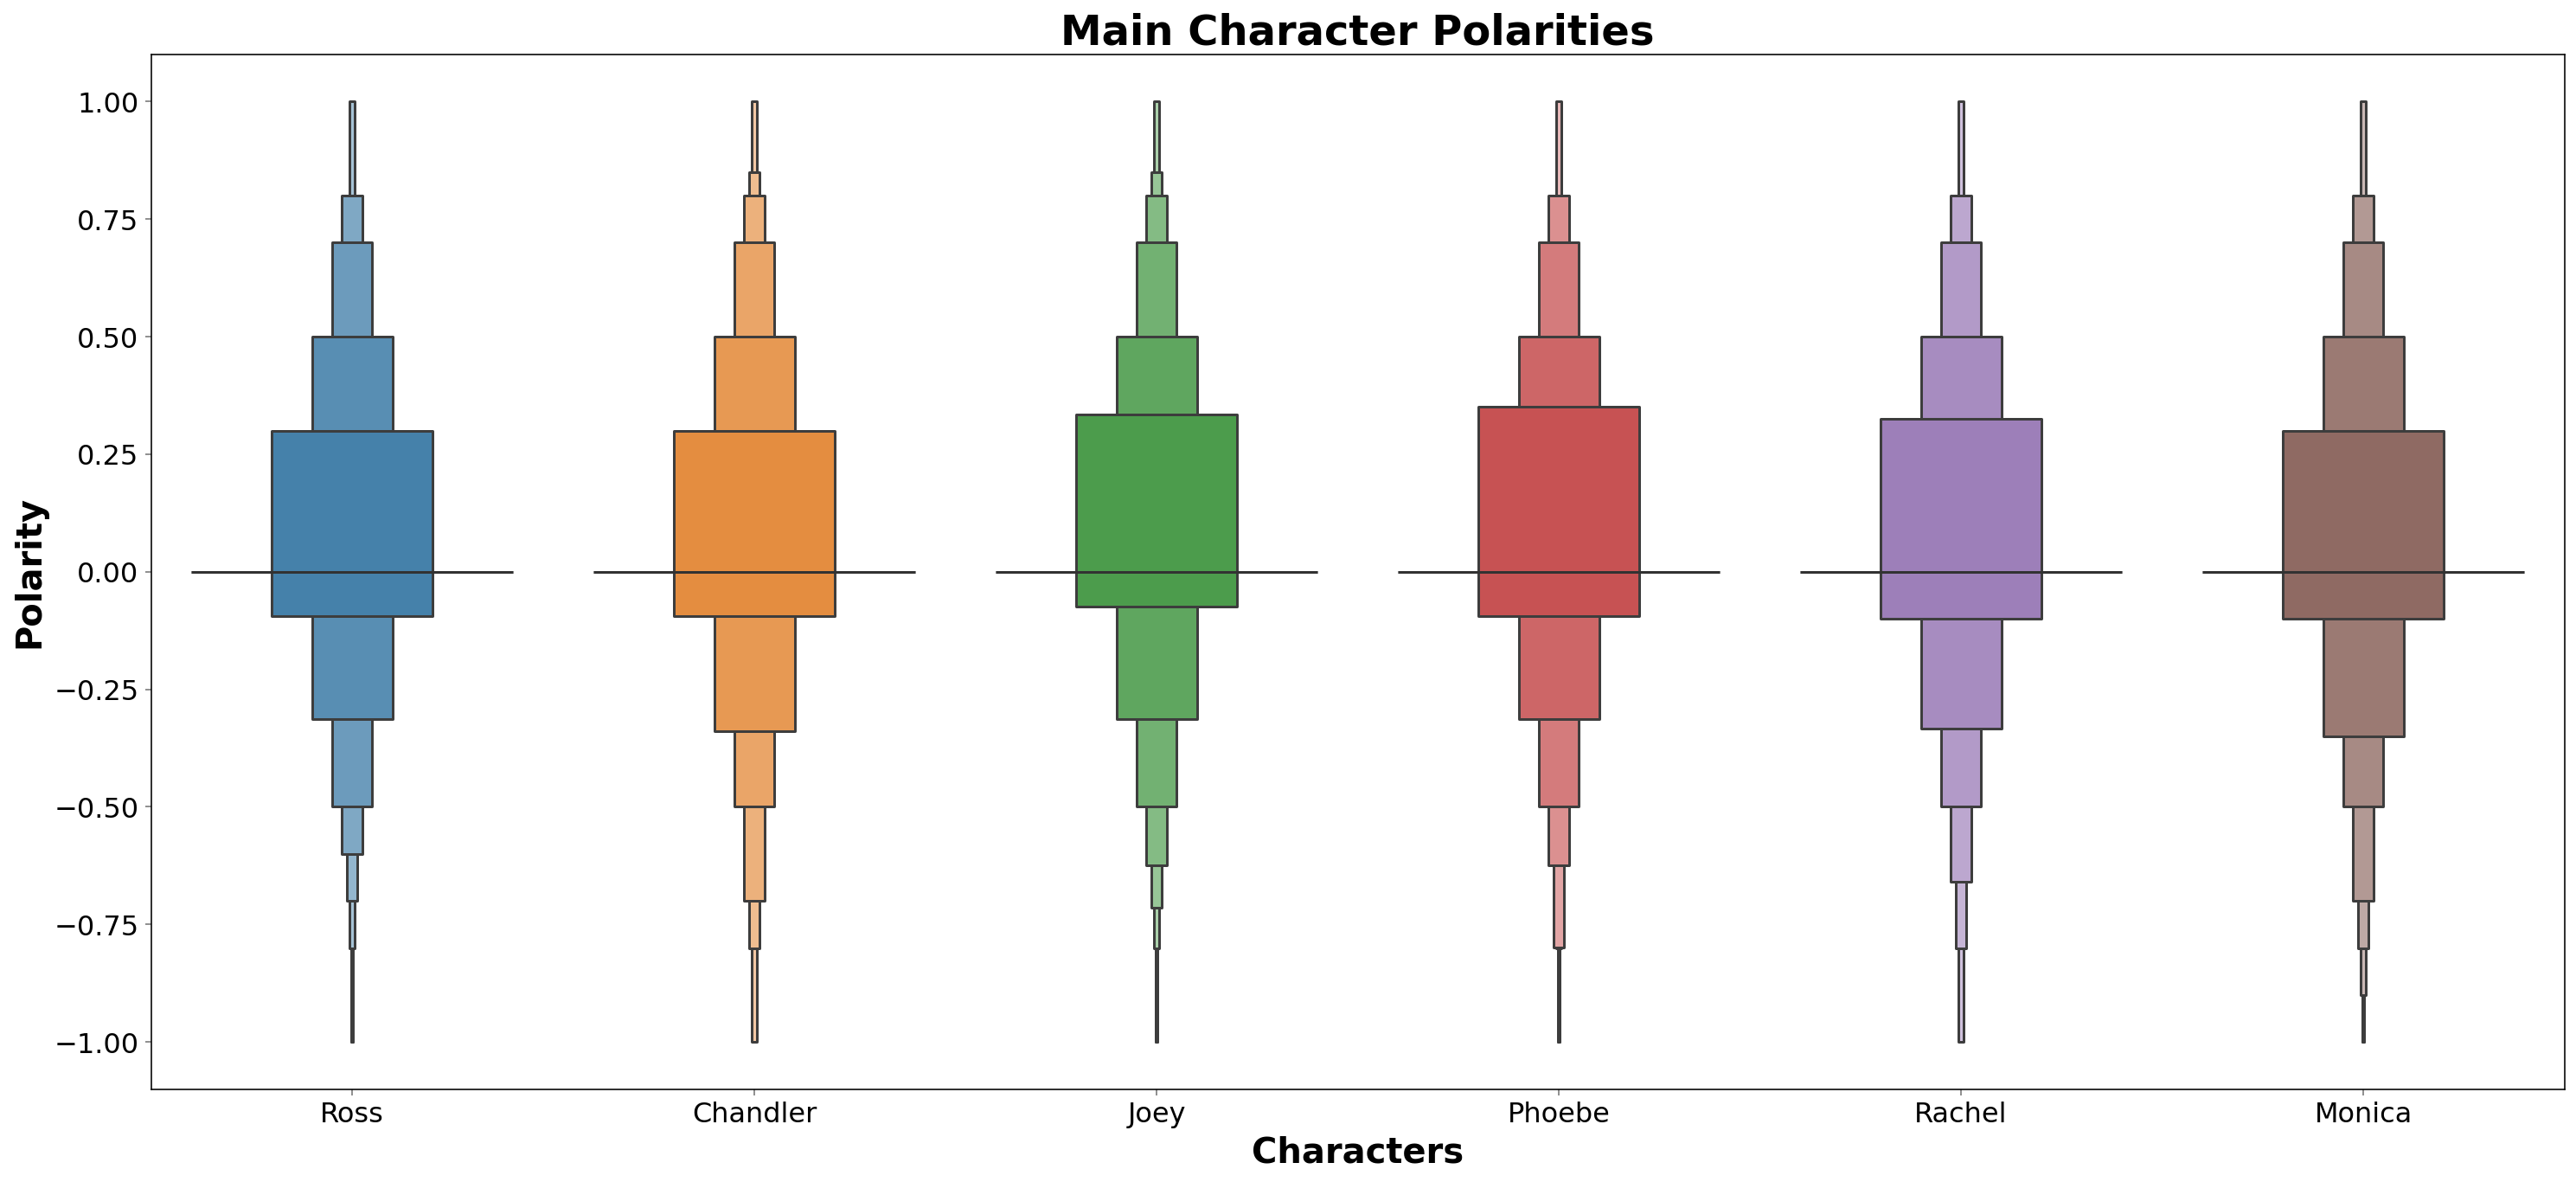

In [71]:
df['Sentiment Scores'] = df['new_lines'].apply(lambda x:TextBlob(x).sentiment)
df['Polarity'] = df['Sentiment Scores'].apply(lambda x:x[0])
df['Subjectivity'] = df['Sentiment Scores'].apply(lambda x: x[1])

fig, ax = plt.subplots(figsize=(25,11))
ax.tick_params(axis='x', labelsize=16, color='#777777')
ax.tick_params(axis='y', labelsize=16, color='#777777')
sns.boxenplot(x='char', y='Polarity', data=df_filtered[['char', 'Polarity']])
plt.title('Main Character Polarities', fontsize=24, fontweight="bold")

plt.xlabel('Characters', fontsize=20, fontweight="bold")
plt.ylabel('Polarity', fontsize=20, fontweight="bold")

#plt.savefig('Polarities.png')

plt.show()

## 6. Topic Modeling

### 6a. Latent Dirichlet Allocation

In [72]:
df.head()

,season,episode,char,line,new_lines,Polarity,Subjectivity,sentiment,Sentiment Scores
0,6,16,Ross,hey remember when i had a monkey,remember monkey,-0.05,0.0,negative,"(-0.05, 0.0)"
1,6,16,Chandler,yeah,,0.00,0.0,neutral,"(0.0, 0.0)"
2,6,16,Ross,yeah what what was i thinking,thinking,0.00,0.0,neutral,"(0.0, 0.0)"
3,6,16,Joey,hes just picked up their bill hey so wha...,hes picked whats percent tip wrong,-0.50,0.9,negative,"(-0.5, 0.9)"
4,6,16,Chandler,twenty percent is a pretty generous tip joe,percent pretty generous tip joe,0.25,1.0,positive,"(0.25, 1.0)"


In [73]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words=new_stopwords)
doc_term_matrix = count_vect.fit_transform(df['new_lines'].values.astype('U'))

In [74]:
doc_term_matrix

<59592x9312 sparse matrix of type '<class 'numpy.int64'>'
	with 253385 stored elements in Compressed Sparse Row format>

In [75]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [76]:
import random

for i in range(10):
    random_id = random.randint(0, len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

branson
centered
yell
frisbee
spout
cheat
monopoly
soapie
pair
performing


In [77]:
first_topic = LDA.components_[0]

In [78]:
top_topic_words = first_topic.argsort()[-10:]

In [79]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

time
wanna
little
people
great
sure
yes
god
think
ross


In [80]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['time', 'wanna', 'little', 'people', 'great', 'sure', 'yes', 'god', 'think', 'ross']


Top 10 words for topic #1:
['wow', 'tell', 'maybe', 'come', 'guys', 'look', 'mean', 'like', 'gonna', 'know']


Top 10 words for topic #2:
['fine', 'let', 'ross', 'sorry', 'going', 'huh', 'chandler', 'phoebe', 'joey', 'monica']


Top 10 words for topic #3:
['honey', 'guy', 'thank', 'said', 'entering', 'got', 'know', 'wait', 'want', 'good']


Top 10 words for topic #4:
['starts', 'phoebe', 'looks', 'room', 'phone', 'door', 'joey', 'ross', 'chandler', 'rachel']




In [81]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(59592, 5)

In [82]:
df['Topic_LDA'] = topic_values.argmax(axis=1)

In [83]:
LDA_dict = {0:'Assurance',
            1:'Explanation',
            2:'Apology',
            3:'Endearment',
            4:'Character Mentions'}

In [84]:
df = df.replace({"Topic_LDA": LDA_dict})
df.head()

,season,episode,char,line,new_lines,Polarity,Subjectivity,sentiment,Sentiment Scores,Topic_LDA
0,6,16,Ross,hey remember when i had a monkey,remember monkey,-0.05,0.0,negative,"(-0.05, 0.0)",Endearment
1,6,16,Chandler,yeah,,0.00,0.0,neutral,"(0.0, 0.0)",Assurance
2,6,16,Ross,yeah what what was i thinking,thinking,0.00,0.0,neutral,"(0.0, 0.0)",Character Mentions
3,6,16,Joey,hes just picked up their bill hey so wha...,hes picked whats percent tip wrong,-0.50,0.9,negative,"(-0.5, 0.9)",Explanation
4,6,16,Chandler,twenty percent is a pretty generous tip joe,percent pretty generous tip joe,0.25,1.0,positive,"(0.25, 1.0)",Character Mentions


In [85]:
df.dtypes

season               object
episode              object
char                 object
line                 object
new_lines            object
Polarity            float64
Subjectivity        float64
sentiment            object
Sentiment Scores     object
Topic_LDA            object
dtype: object

### 6b. LDA Visualization

In [137]:
seasons = df['season'].unique()

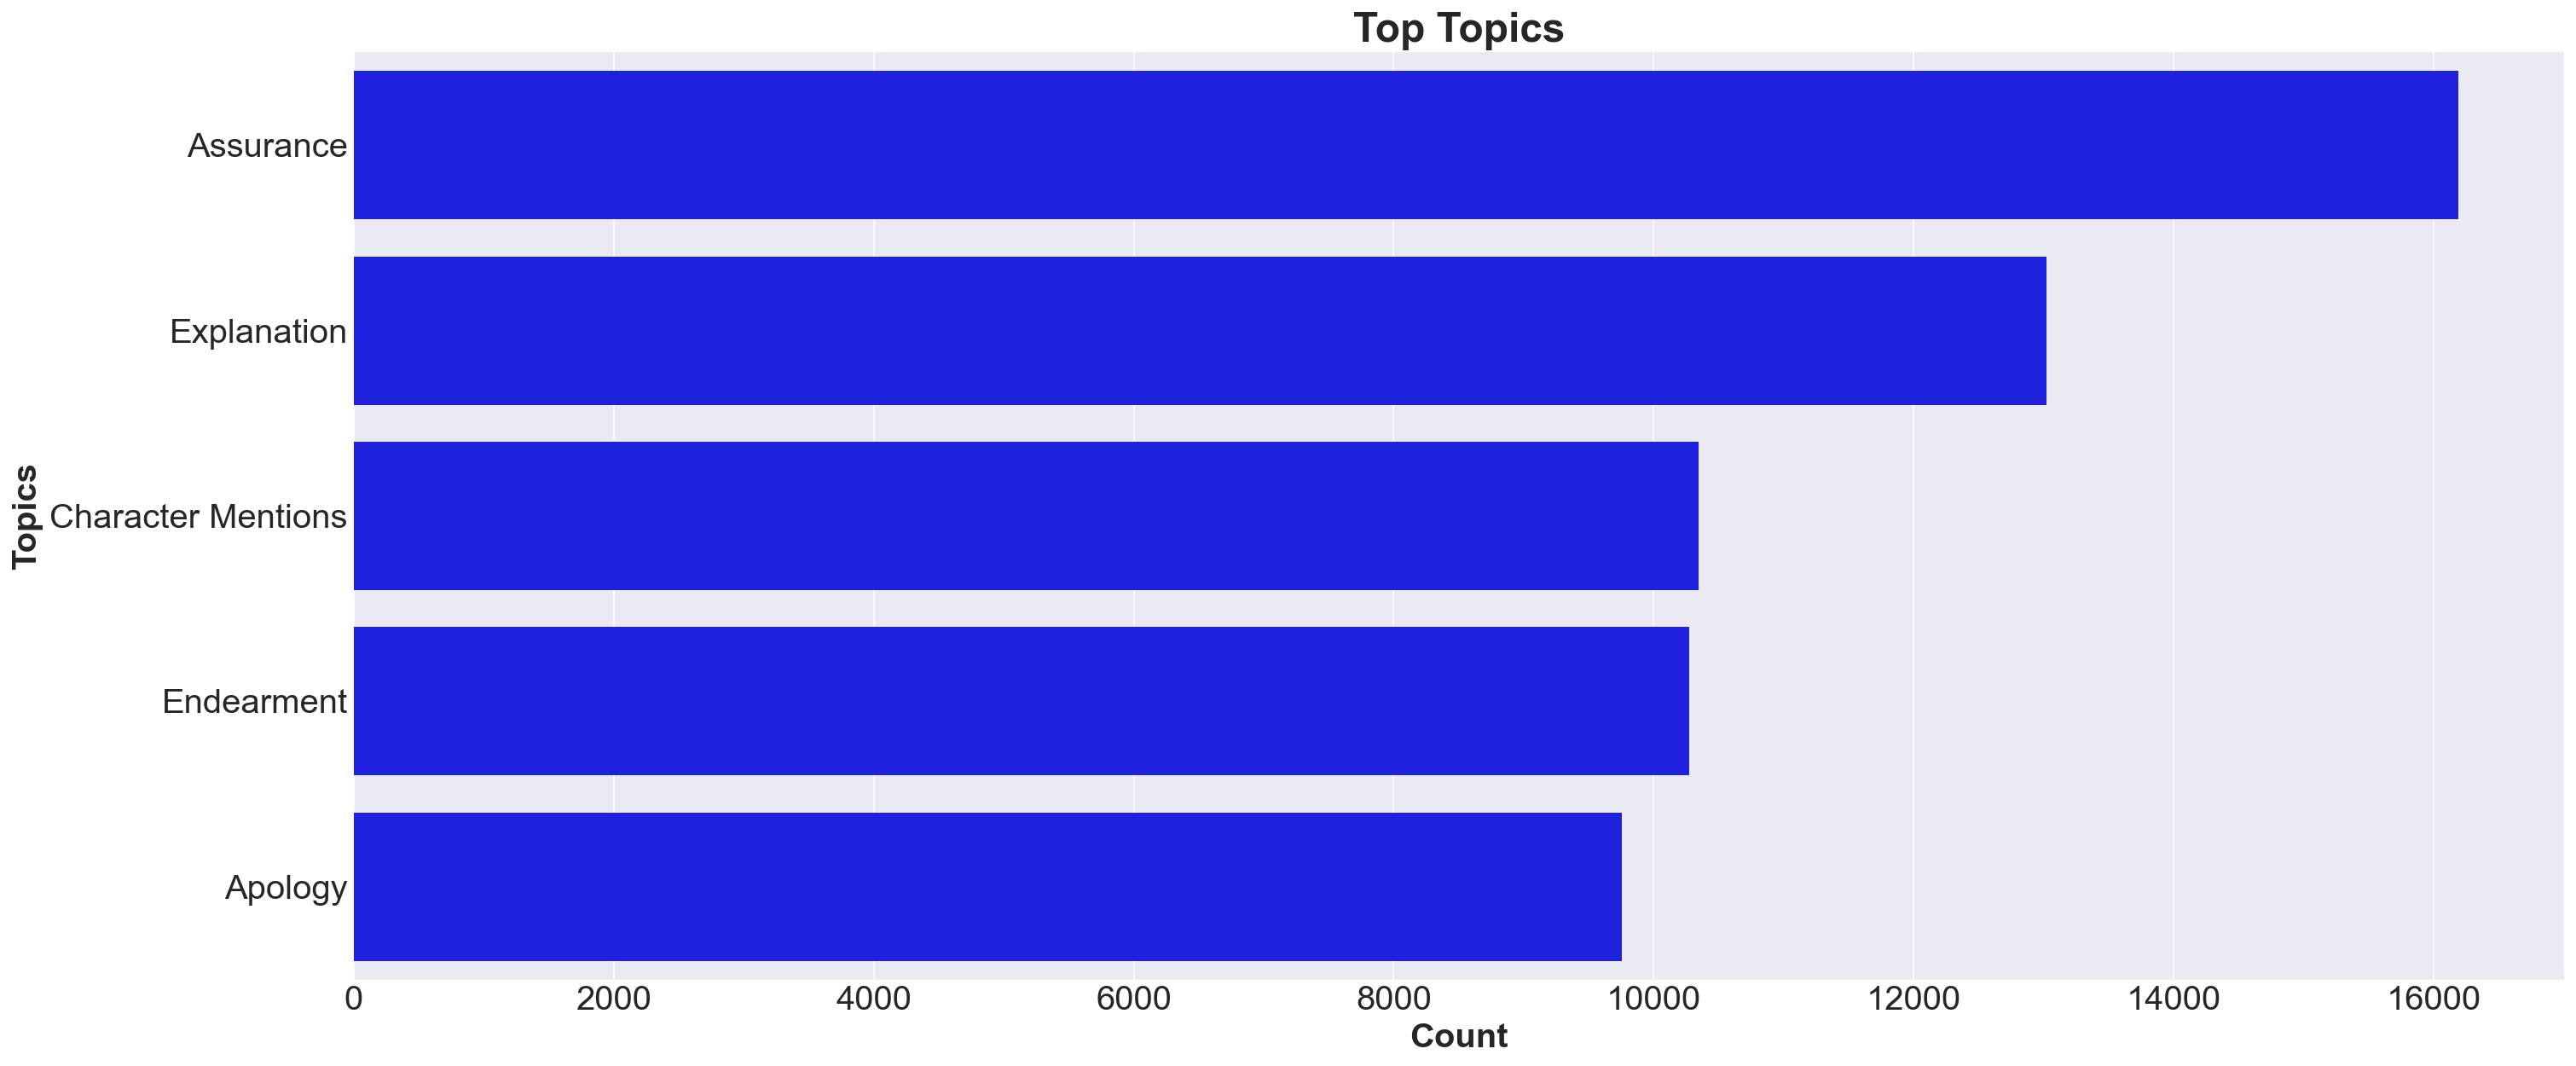

In [141]:
#Overall Topics

fig, ax = plt.subplots(figsize=(24,10))
sns.countplot(y='Topic_LDA', data=df, color='blue', order = df['Topic_LDA'].value_counts().index)

plt.ylabel('Topics', fontsize=20, fontweight='bold')
plt.xlabel('Count', fontsize=20, fontweight='bold')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.gcf().subplots_adjust(left=0.15)


plt.title('Top Topics', fontsize=24, fontweight='bold')

#plt.savefig('total_df_topics.png')
plt.show()

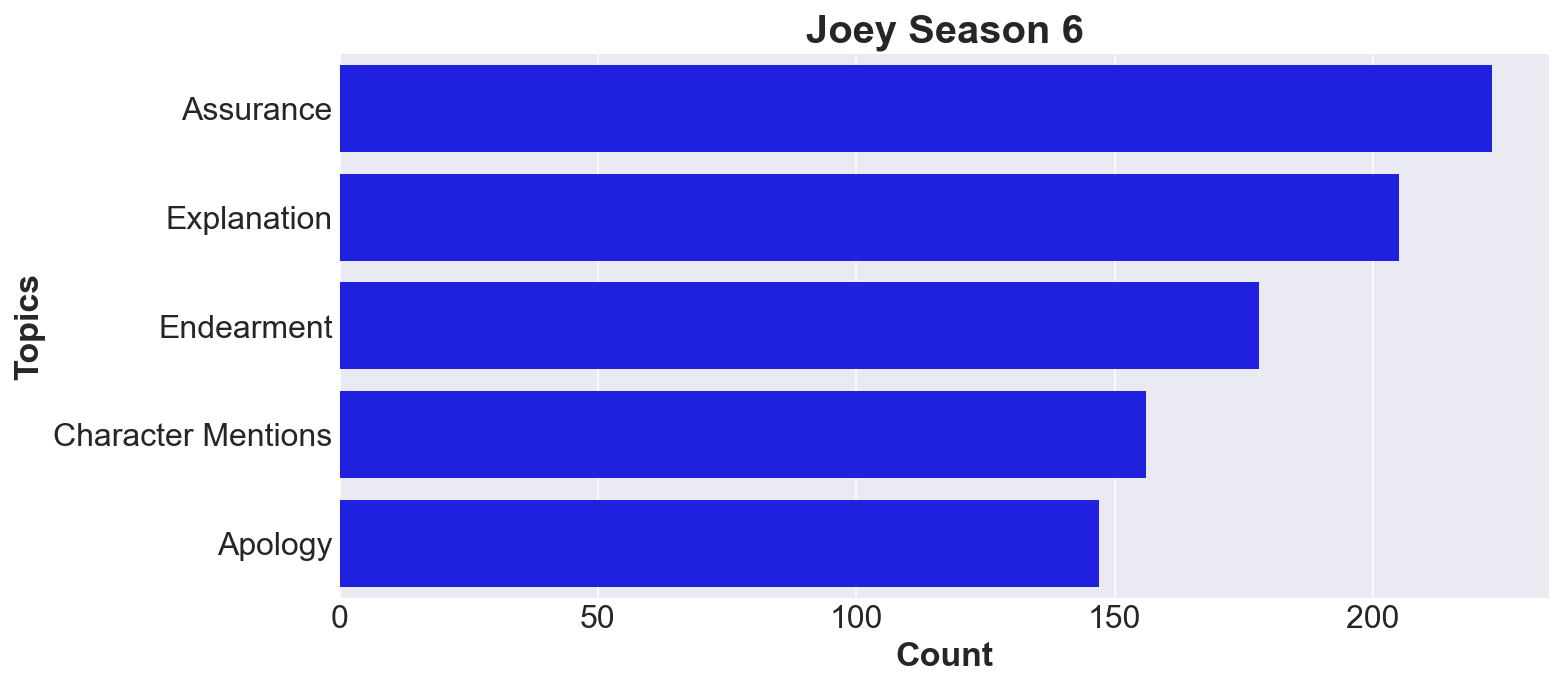

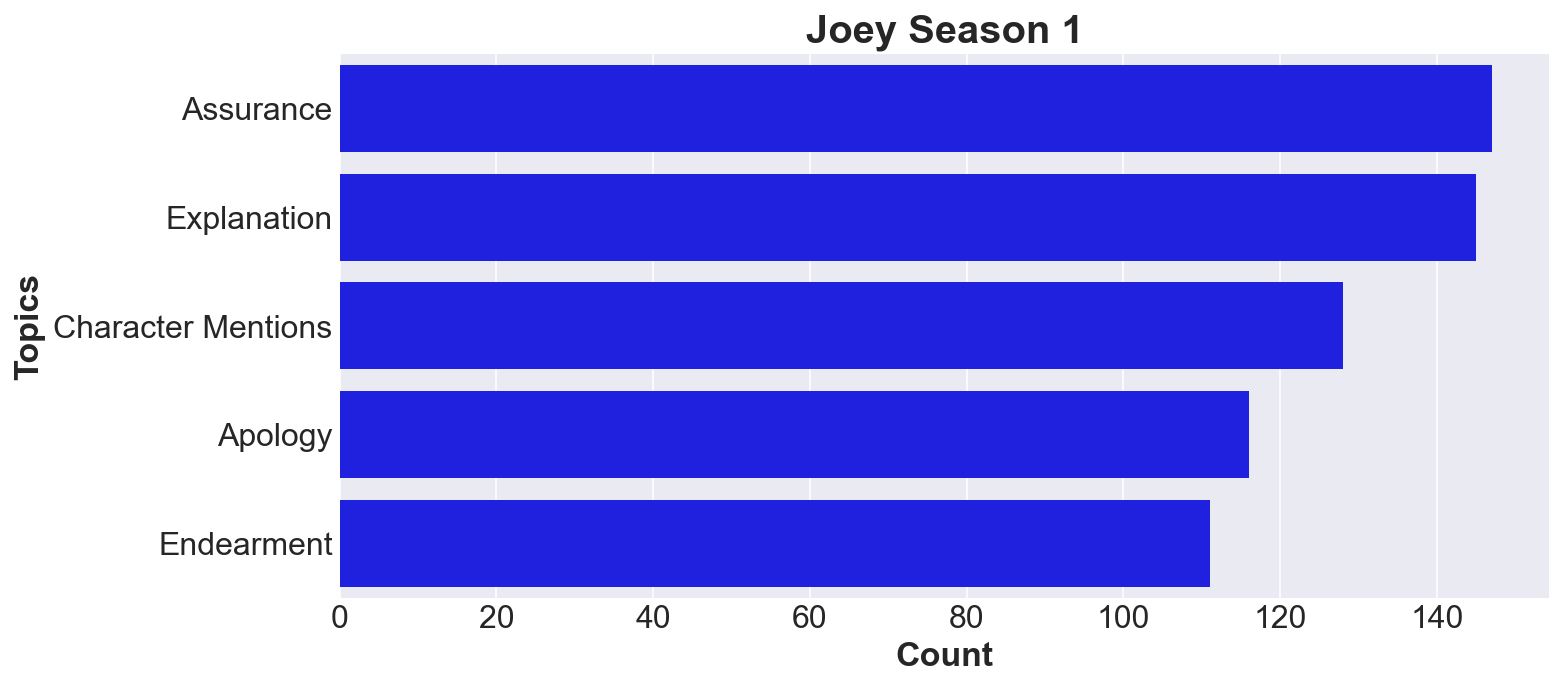

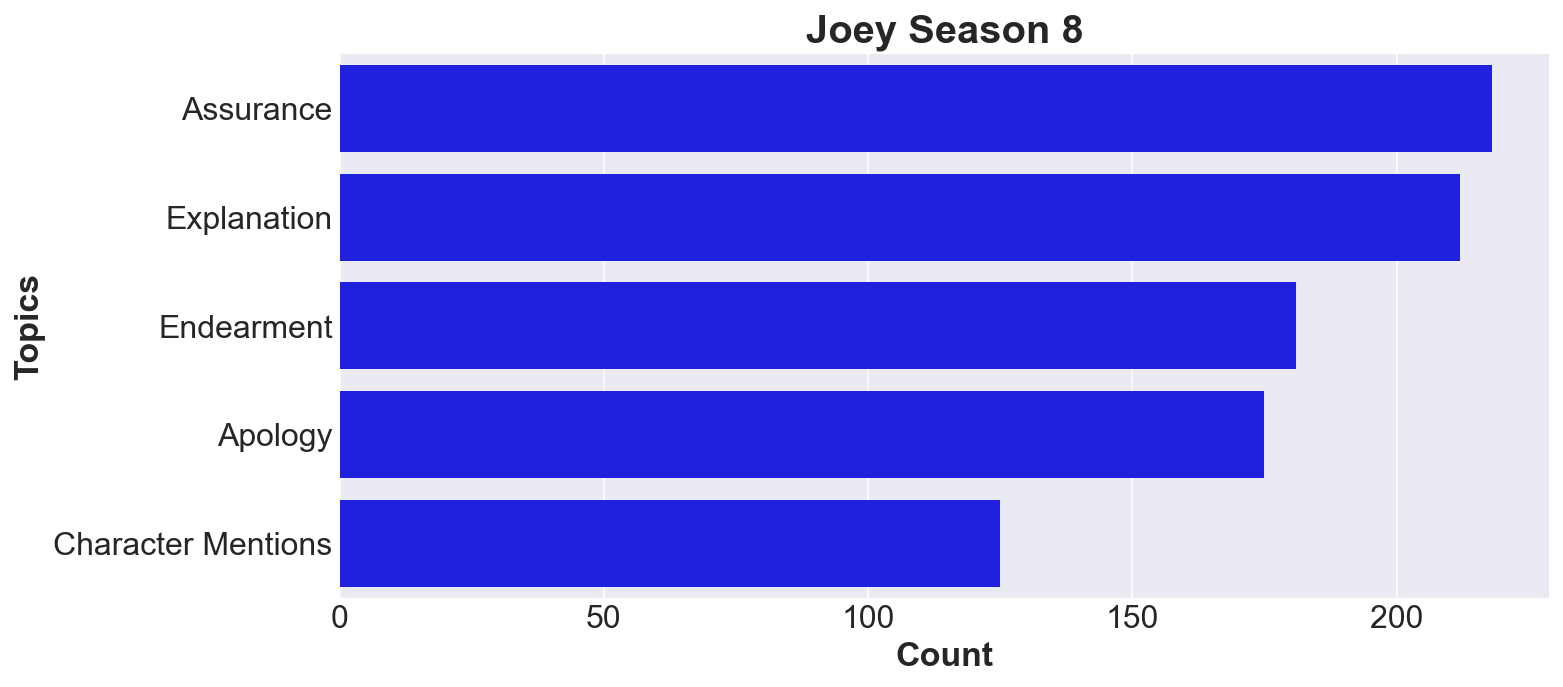

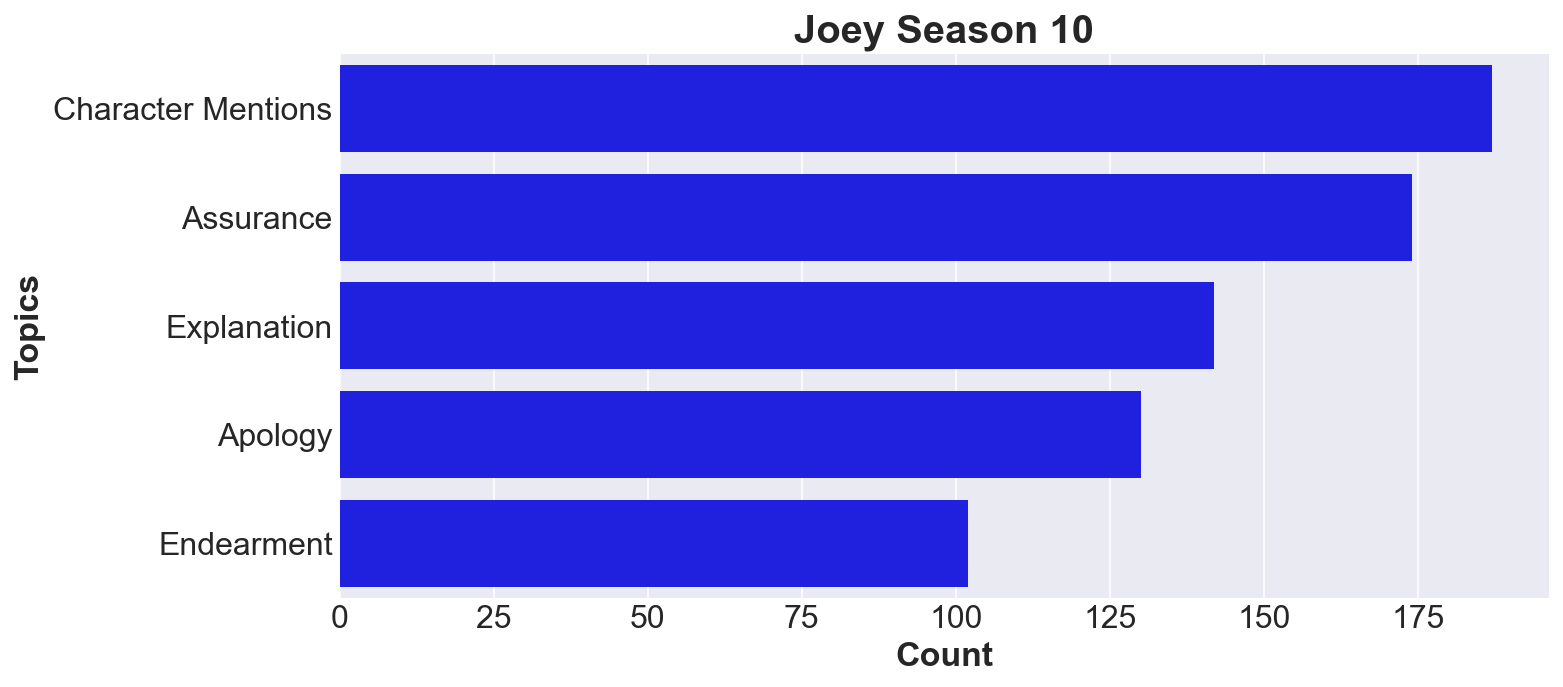

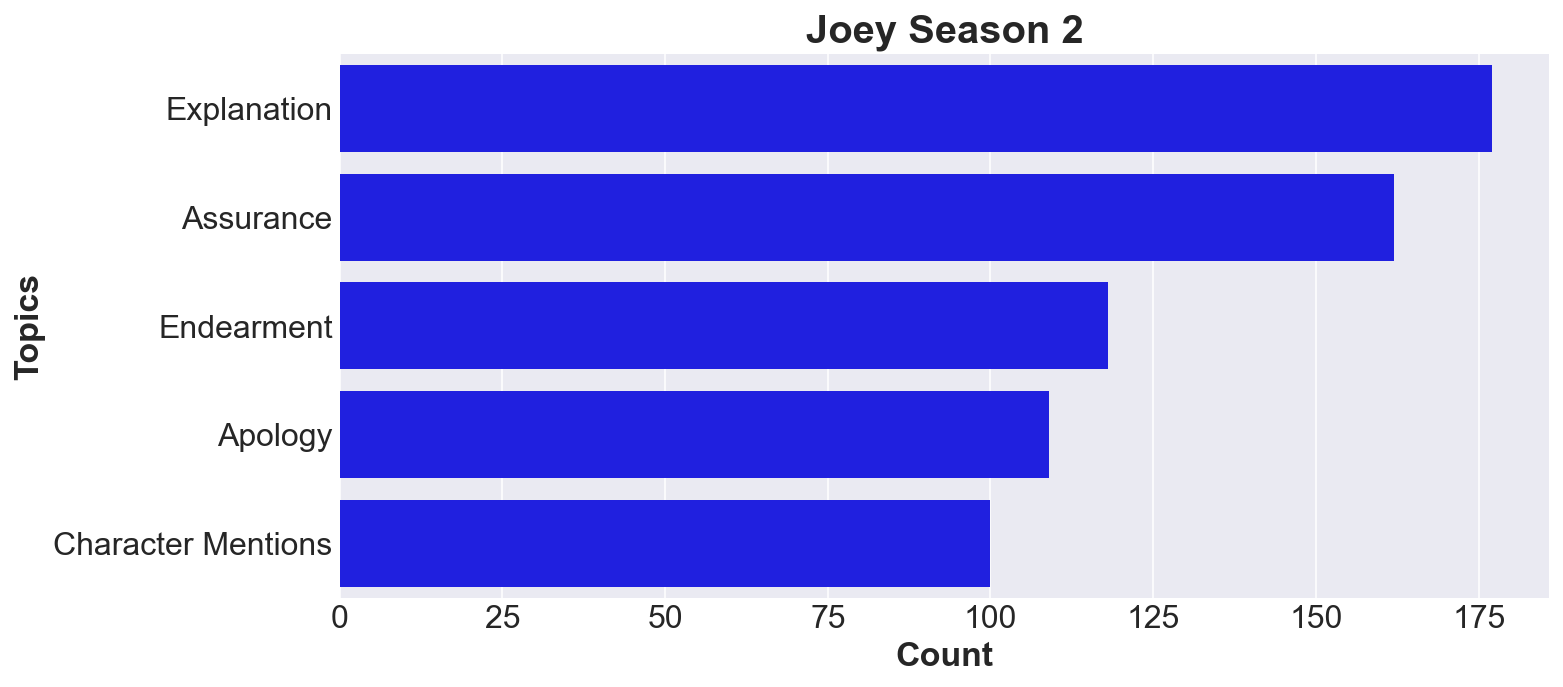

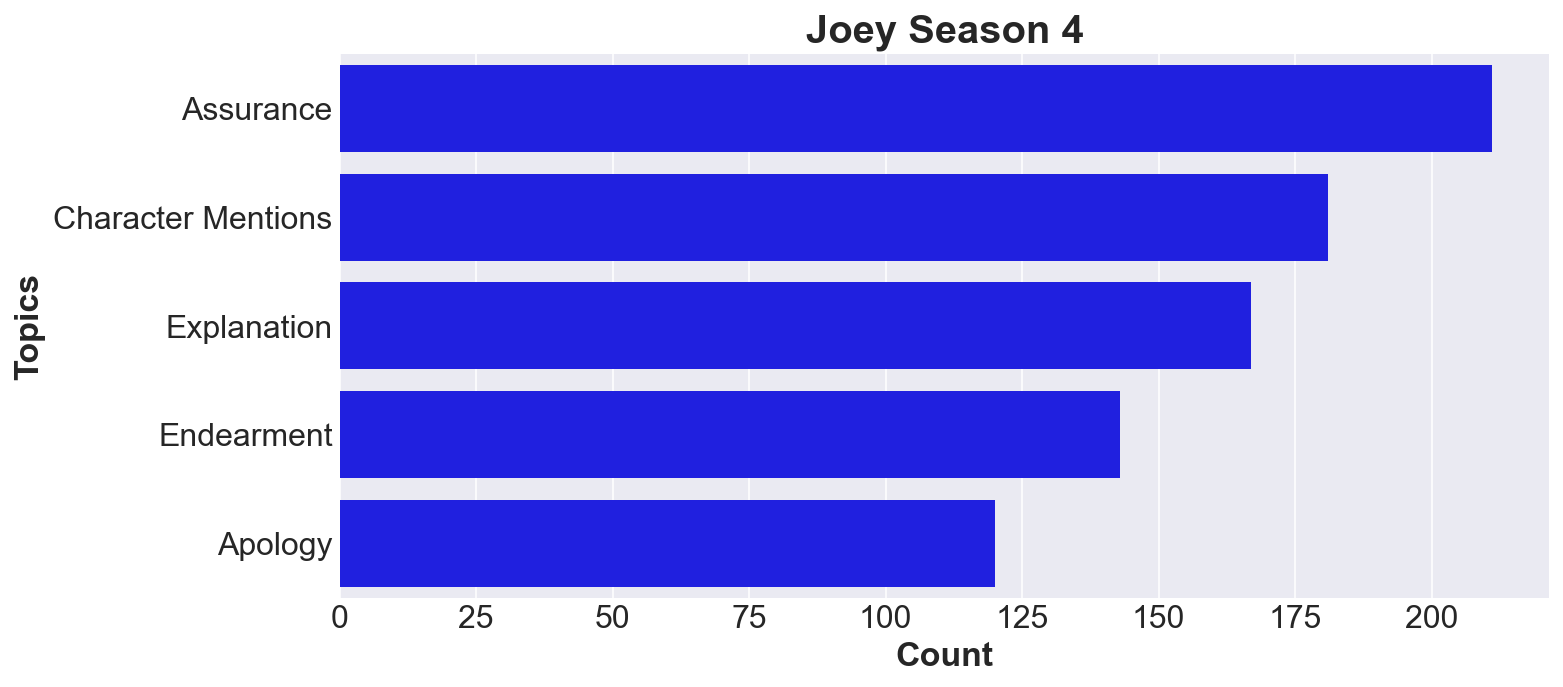

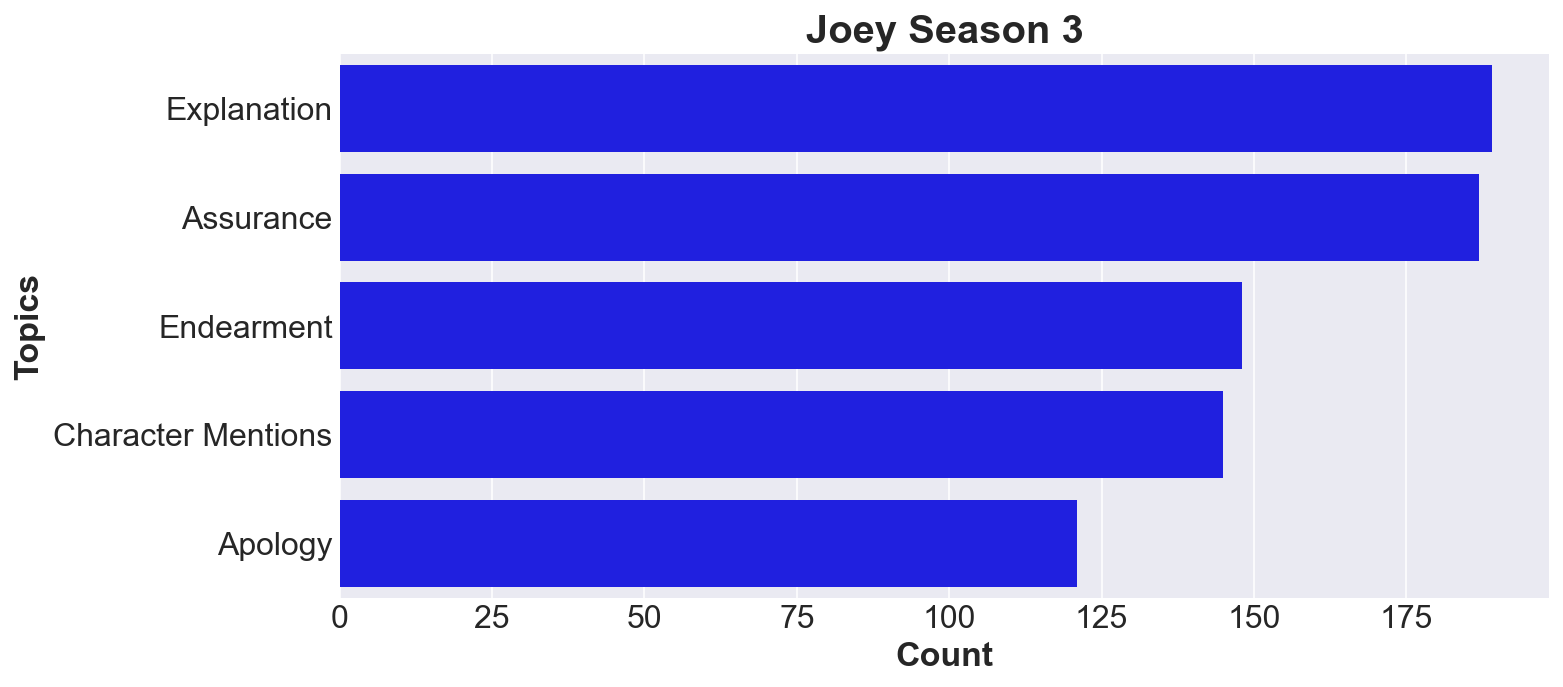

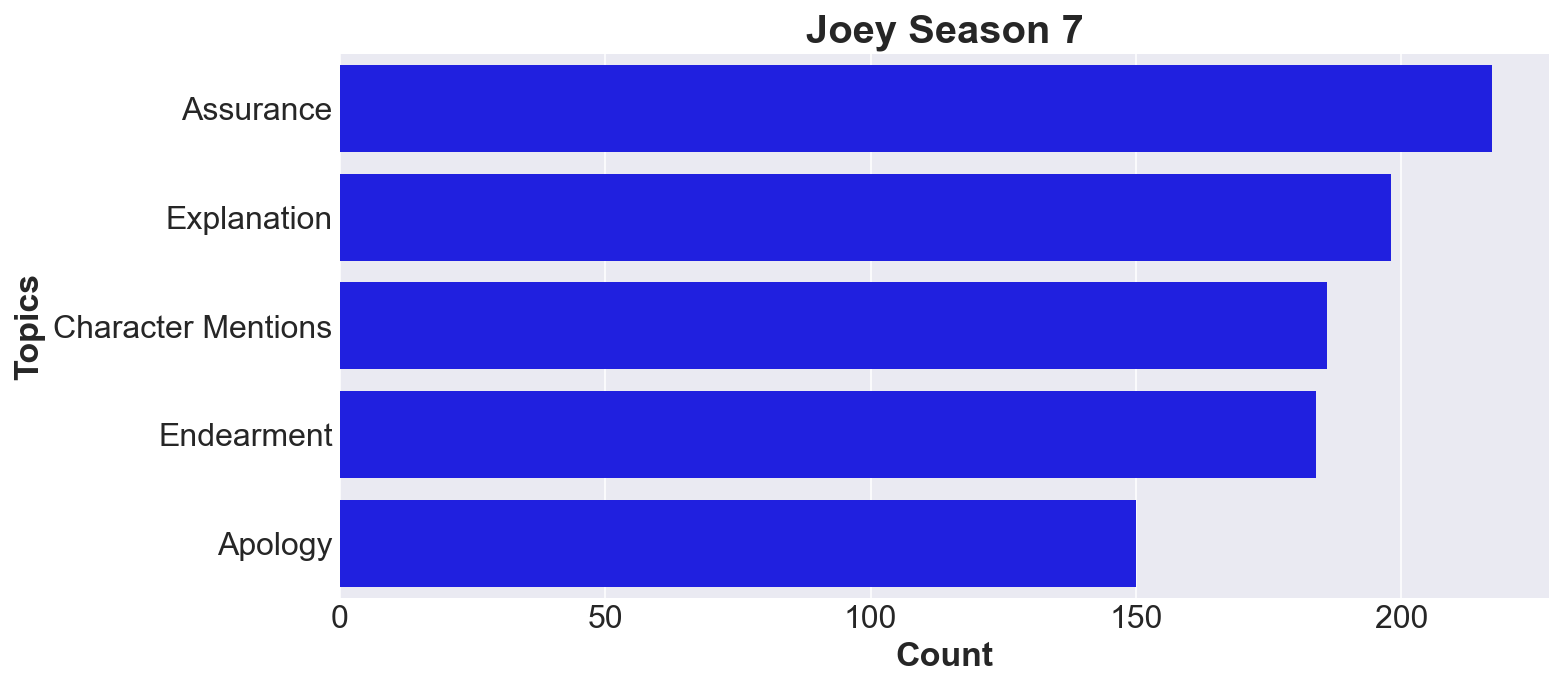

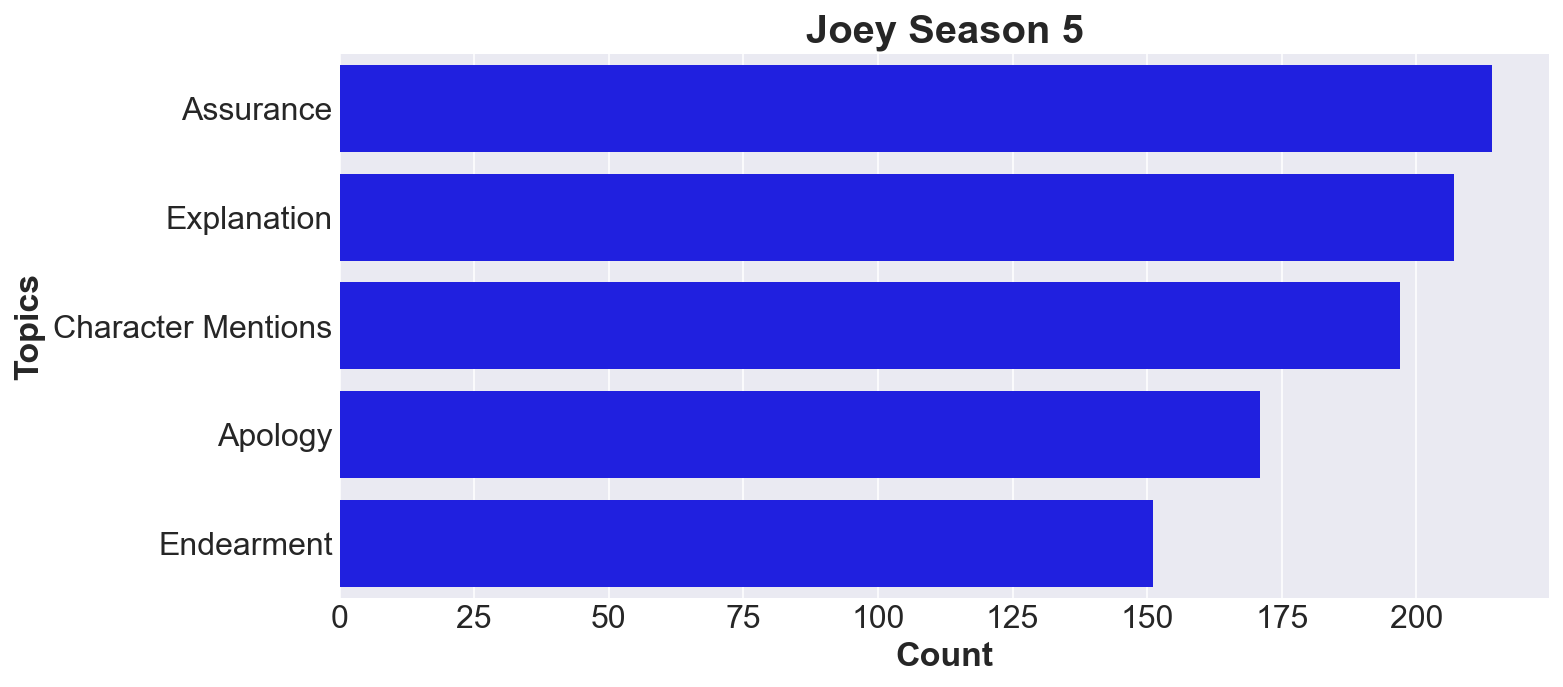

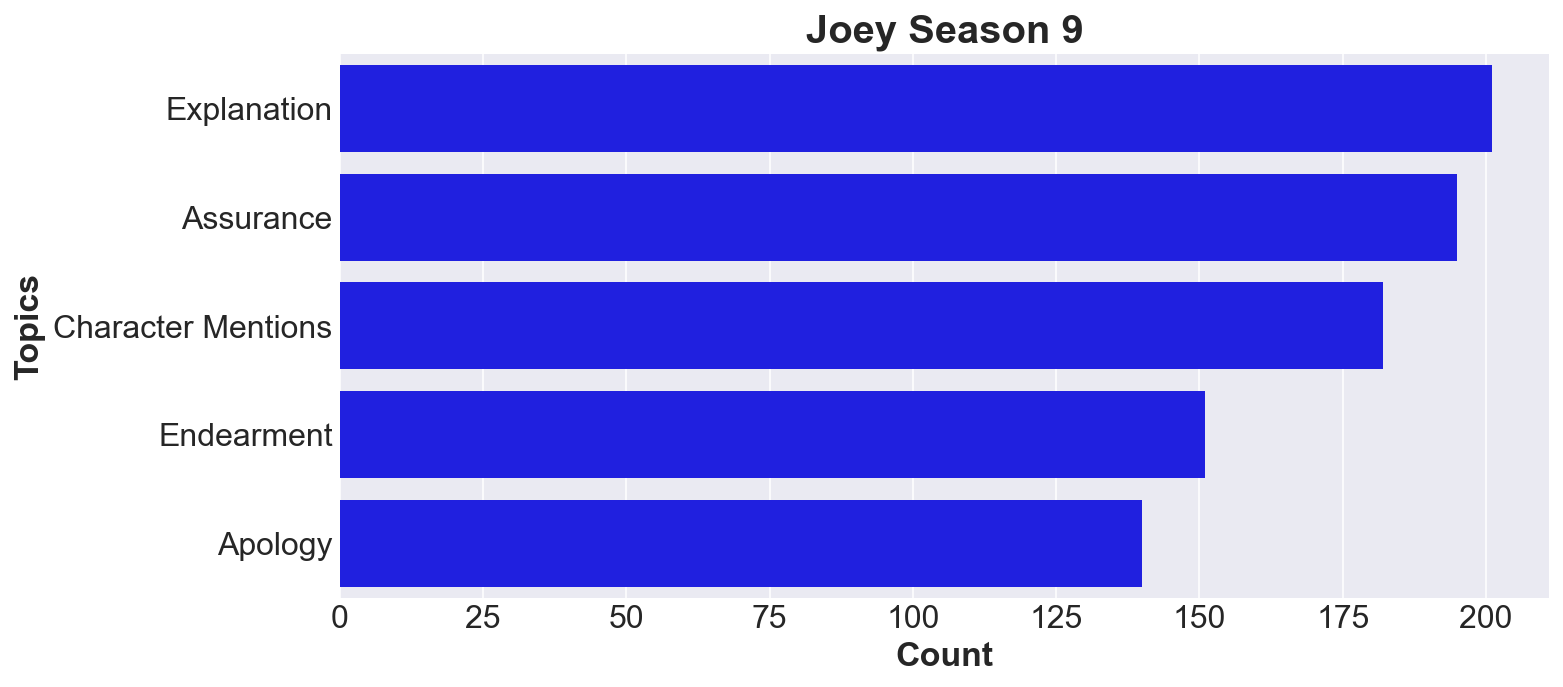

In [162]:
for season in seasons:
    
    fig, ax = plt.subplots(figsize=(12,5))
    
    joey_df = df[(df['char'] == 'Joey') & (df['season'] == season)]
    sns.countplot(y='Topic_LDA', data=joey_df, color='blue', order = joey_df['Topic_LDA'].value_counts().index)
    
    plt.ylabel('Topics', fontsize=17, fontweight='bold')
    plt.xlabel('Count', fontsize=17, fontweight='bold')
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.gcf().subplots_adjust(left=0.2)
    
    plt.title('Joey Season ' + ( season), fontsize=20, fontweight='bold')
    
    #plt.savefig('joey'+str(season)+'topics.png')
    plt.show()

### 6c.  Non-Negative Matrix Factorization

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words=new_stopwords)
doc_term_matrix = tfidf_vect.fit_transform(df['new_lines'].values.astype('U'))

In [90]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=10, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=10, random_state=42)

In [91]:
import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

celebrate
captains
beach
fail
railing
bag
inches
clips
lightning
intravenous


In [92]:
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]

In [93]:
for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

little
thought
talking
ya
time
thing
want
maybe
mean
know


In [94]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['little', 'thought', 'talking', 'ya', 'time', 'thing', 'want', 'maybe', 'mean', 'know']


Top 10 words for topic #1:
['tell', 'thank', 'room', 'cut', 'door', 'entering', 'rachel', 'phoebe', 'monica', 'chandler']


Top 10 words for topic #2:
['dear', 'gasps', 'hug', 'mrs', 'shocked', 'happened', 'believe', 'love', 'thank', 'god']


Top 10 words for topic #3:
['starts', 'door', 'enters', 'tell', 'looks', 'let', 'got', 'come', 'rachel', 'ross']


Top 10 words for topic #4:
['better', 'work', 'actually', 'thing', 'need', 'time', 'maybe', 'little', 'mean', 'think']


Top 10 words for topic #5:
['fine', 'time', 'course', 'dr', 'pause', 'rachel', 'tell', 'said', 'thank', 'yes']


Top 10 words for topic #6:
['turns', 'wait', 'enters', 'room', 'walks', 'tribbiani', 'door', 'come', 'looks', 'joey']


Top 10 words for topic #7:
['ask', 'believe', 'fine', 'love', 'happen', 'let', 'guys', 'baby', 'tell', 'gonna']


Top 10 words for topic #8:
['got', 'come', 'mean', 'want

In [95]:
NMF_dict = {0: ''}

In [96]:
topic_values = nmf.transform(doc_term_matrix)
df['Topic_NMF'] = topic_values.argmax(axis=1)
df.head(10)

,season,episode,char,line,new_lines,Polarity,Subjectivity,sentiment,Sentiment Scores,Topic_LDA,Topic_NMF
0,6,16,Ross,hey remember when i had a monkey,remember monkey,-0.050000,0.000000,negative,"(-0.05, 0.0)",Endearment,8
1,6,16,Chandler,yeah,,0.000000,0.000000,neutral,"(0.0, 0.0)",Assurance,0
2,6,16,Ross,yeah what what was i thinking,thinking,0.000000,0.000000,neutral,"(0.0, 0.0)",Character Mentions,8
3,6,16,Joey,hes just picked up their bill hey so wha...,hes picked whats percent tip wrong,-0.500000,0.900000,negative,"(-0.5, 0.9)",Explanation,8
4,6,16,Chandler,twenty percent is a pretty generous tip joe,percent pretty generous tip joe,0.250000,1.000000,positive,"(0.25, 1.0)",Character Mentions,8
5,6,16,Joey,yknow whats more generous than that fifty...,yknow whats generous percent yknow whats g...,0.000000,0.000000,neutral,"(0.0, 0.0)",Explanation,0
6,6,16,Chandler,i see where youre goin,youre goin,0.000000,0.000000,neutral,"(0.0, 0.0)",Endearment,6
7,6,16,Ross,whats up with the greed joe,whats greed joe,0.000000,0.000000,neutral,"(0.0, 0.0)",Character Mentions,8
8,6,16,Joey,all right look im sorry you guys but its ...,look im sorry guys its gotta new head shots ...,-0.215909,0.563636,negative,"(-0.2159090909090909, 0.5636363636363636)",Explanation,8
9,6,16,Ross,well isnt there something you can do to earn...,isnt earn little extra money mean cant cant...,-0.125000,0.346875,negative,"(-0.125, 0.34687500000000004)",Explanation,0


## 7. WordCloud

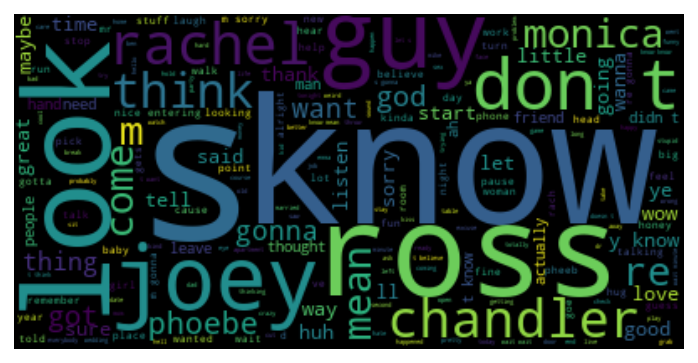

In [97]:
from wordcloud import WordCloud, ImageColorGenerator

text = df['new_lines'].to_string()

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#plt.savefig("WordCloud_All")

plt.show()

### 7a. Ross

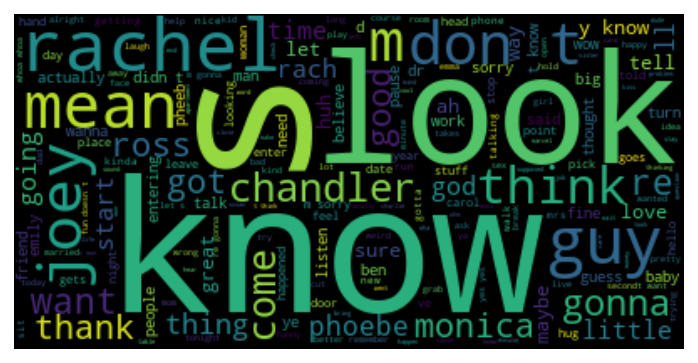

In [98]:
text = ROSS['new_lines'].to_string()

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#plt.savefig('WordCloud_Ross')

plt.show()

### 7b. Rachel

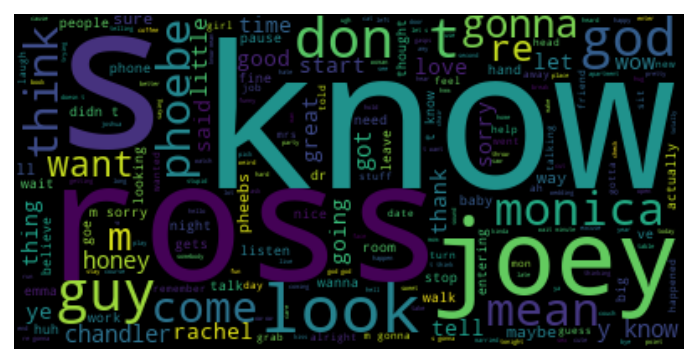

In [99]:
text = RACHEL['new_lines'].to_string()

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#plt.savefig('WordCloud_Rachel')

plt.show()

### 7c. Chandler

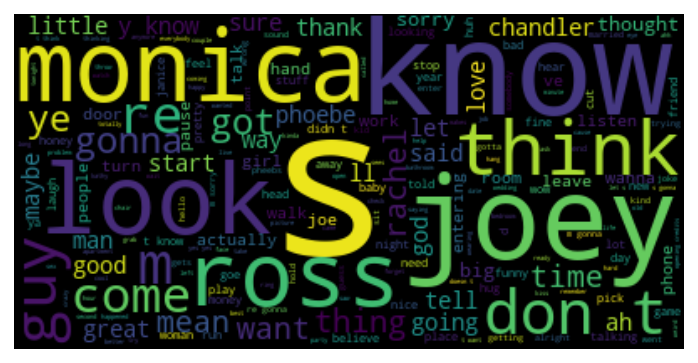

In [100]:
text = CHANDLER['new_lines'].to_string()

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#plt.savefig('WordCloud_Chandler')

plt.show()

### 7d. Joey

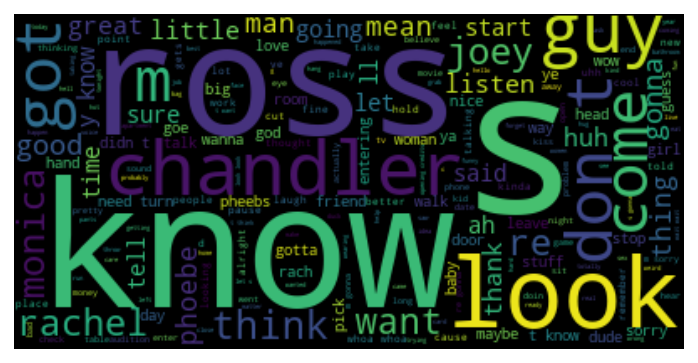

In [101]:
text = JOEY['new_lines'].to_string()

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 7e. Phoebe

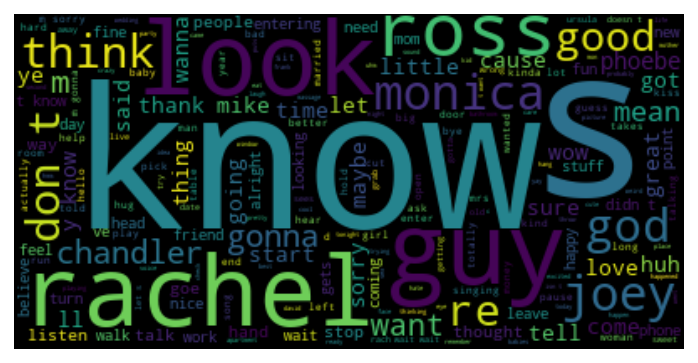

In [102]:
text = PHOEBE['new_lines'].to_string()

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 7f. Monica

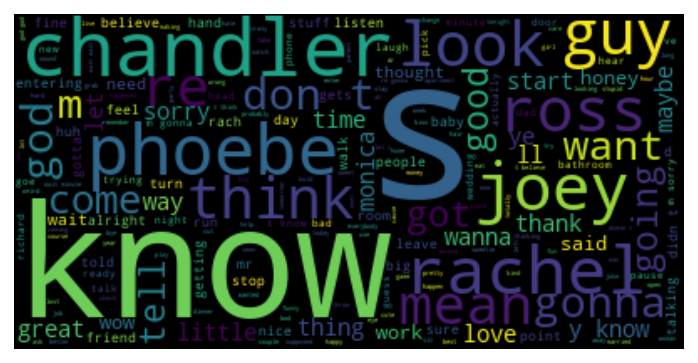

In [103]:
text = MONICA['new_lines'].to_string()

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#plt.savefig('WordCloud_Monica')

plt.show()

## 8. Most Words by Character Visualization

In [104]:
df_filtered['Tokenize Words'] = df_filtered['line'].apply(lambda x:word_tokenize(x))
df_filtered['Tokenize Words Alphanumeric'] = df_filtered['Tokenize Words'].apply(lambda x: [item for item in x if item.isalnum()])
df_filtered['Sentence Word Count'] = df_filtered['Tokenize Words Alphanumeric'].apply(len)
df_filtered.head()

,season,episode,char,line,new_lines,Polarity,Subjectivity,sentiment,Tokenize Words,Tokenize Words Alphanumeric,Sentence Word Count
0,6,16,Ross,hey remember when i had a monkey,remember monkey,-0.05,0.0,negative,"[hey, remember, when, i, had, a, monkey]","[hey, remember, when, i, had, a, monkey]",7
1,6,16,Chandler,yeah,,0.00,0.0,neutral,[yeah],[yeah],1
2,6,16,Ross,yeah what what was i thinking,thinking,0.00,0.0,neutral,"[yeah, what, what, was, i, thinking]","[yeah, what, what, was, i, thinking]",6
3,6,16,Joey,hes just picked up their bill hey so wha...,hes picked whats percent tip wrong,-0.50,0.9,negative,"[hes, just, picked, up, their, bill, hey, so,...","[just, picked, up, their, bill, hey, so, with,...",16
4,6,16,Chandler,twenty percent is a pretty generous tip joe,percent pretty generous tip joe,0.25,1.0,positive,"[twenty, percent, is, a, pretty, generous, tip...","[twenty, percent, is, a, pretty, generous, tip...",8


In [105]:
df_filtered.groupby(['char'])['Sentence Word Count'].sum()

char
Chandler    105986
Joey        109866
Monica      100082
Phoebe       99201
Rachel      118392
Ross        118200
Name: Sentence Word Count, dtype: int64

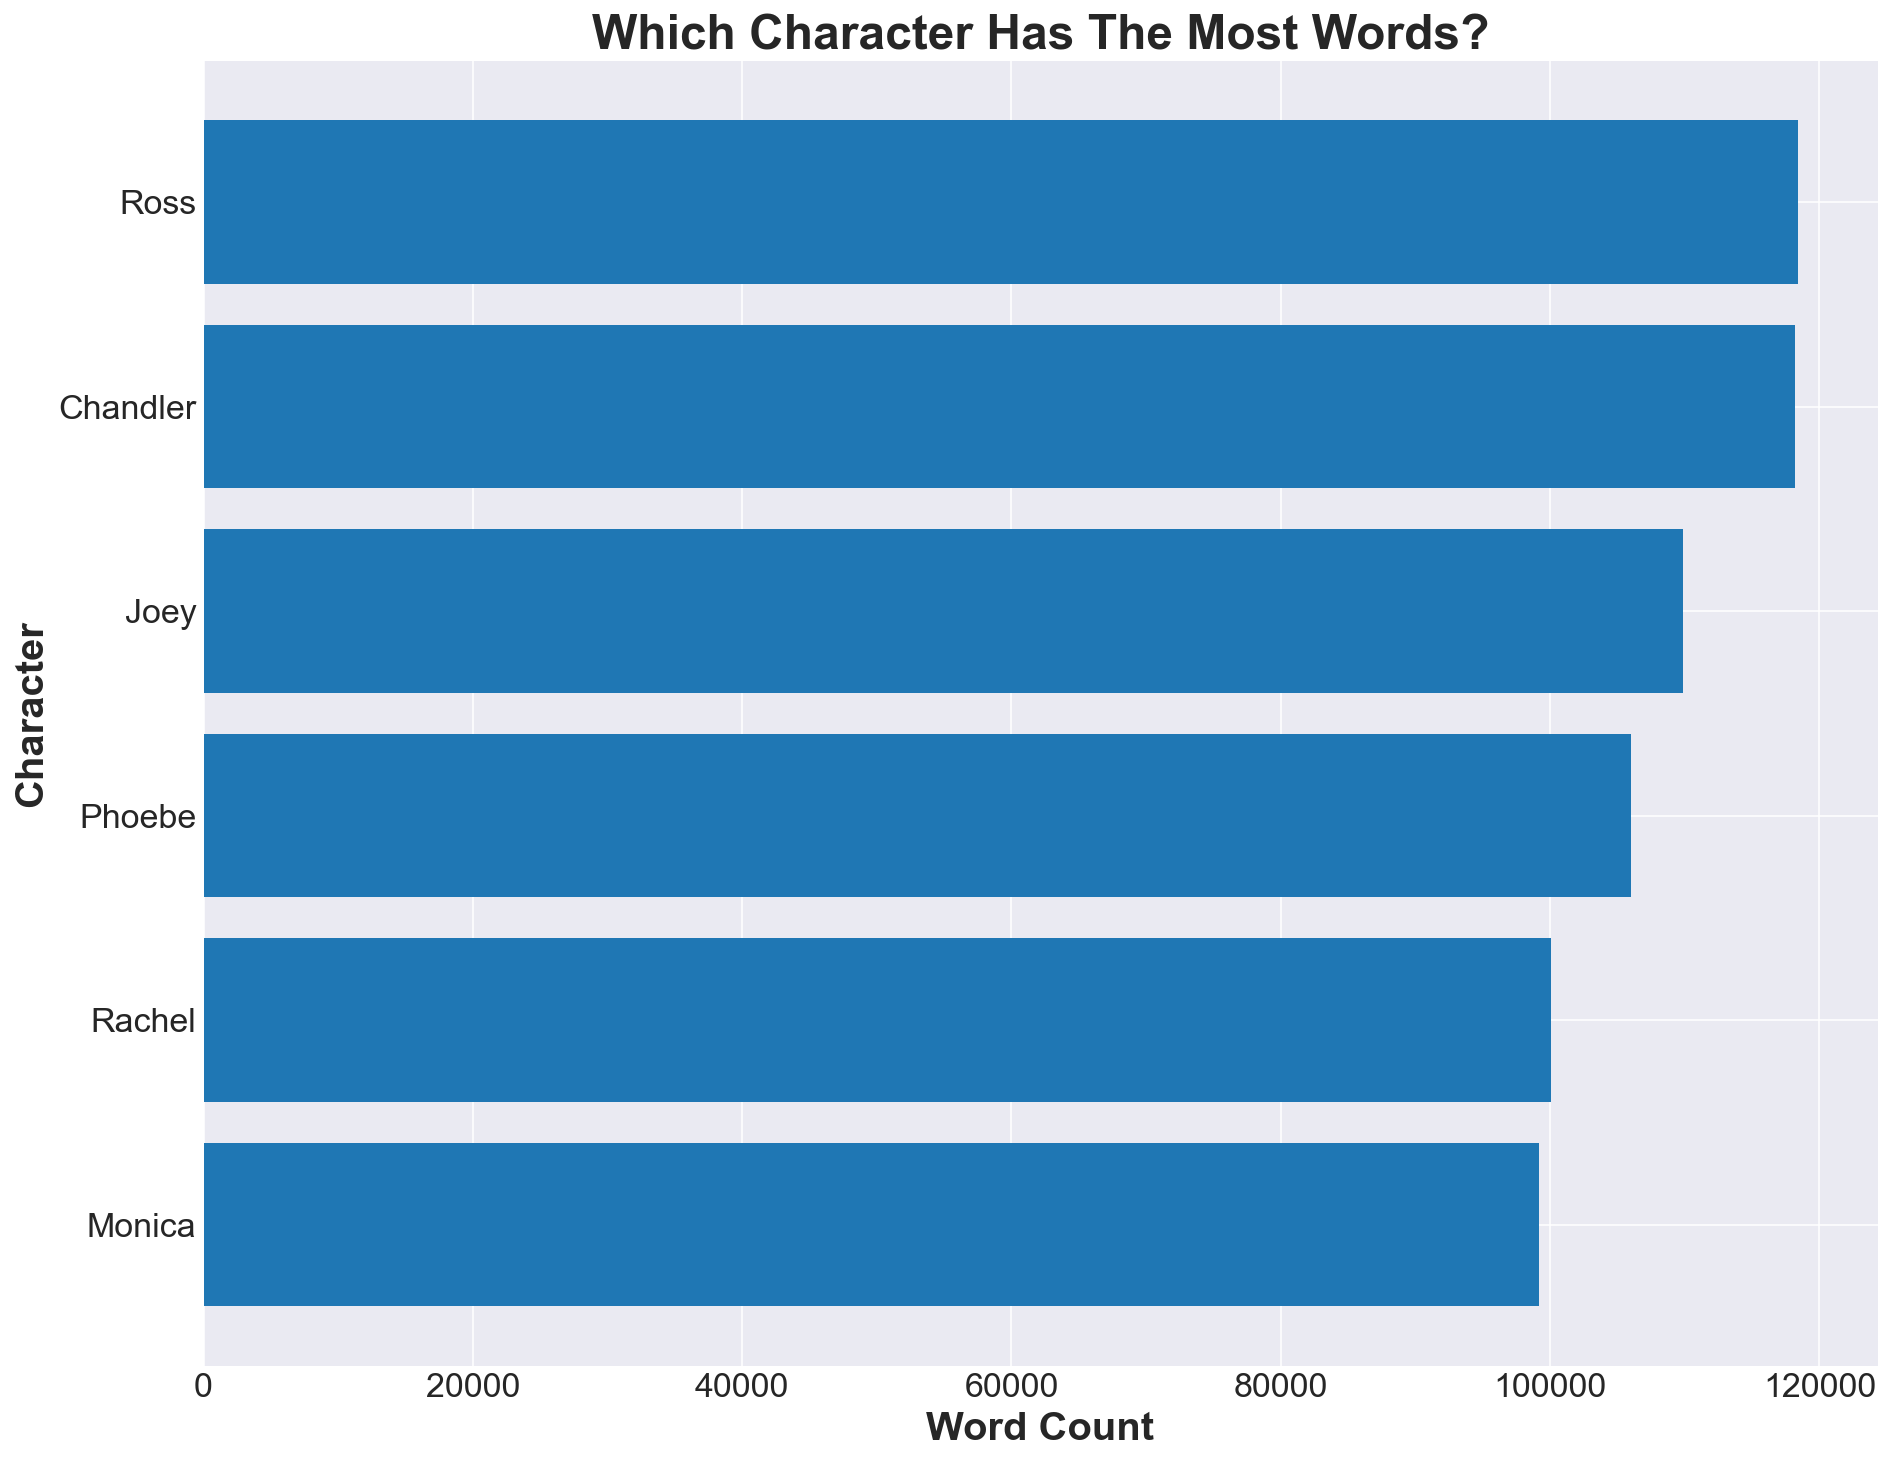

In [106]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

PLOT_STYLE = 'seaborn-darkgrid'

# limit the data to characters with most words
names = df_filtered['char'].unique().tolist()
word_count = df_filtered.groupby(['char'])['Sentence Word Count'].sum().sort_values(ascending=False).tolist()

plt.style.use(PLOT_STYLE)
fig, ax = plt.subplots(figsize=(15, 12))

y_pos = np.arange(len(names))

ax.barh(y_pos, word_count, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(names, size=17)
ax.tick_params(axis='x', labelsize=17)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Word Count', size=20, fontweight="bold")
ax.set_ylabel('Character', size=20, fontweight="bold")
ax.set_title('Which Character Has The Most Words?', size=24, fontweight="bold", ha='center')

#plt.savefig('Character_Most_Words')
plt.show()

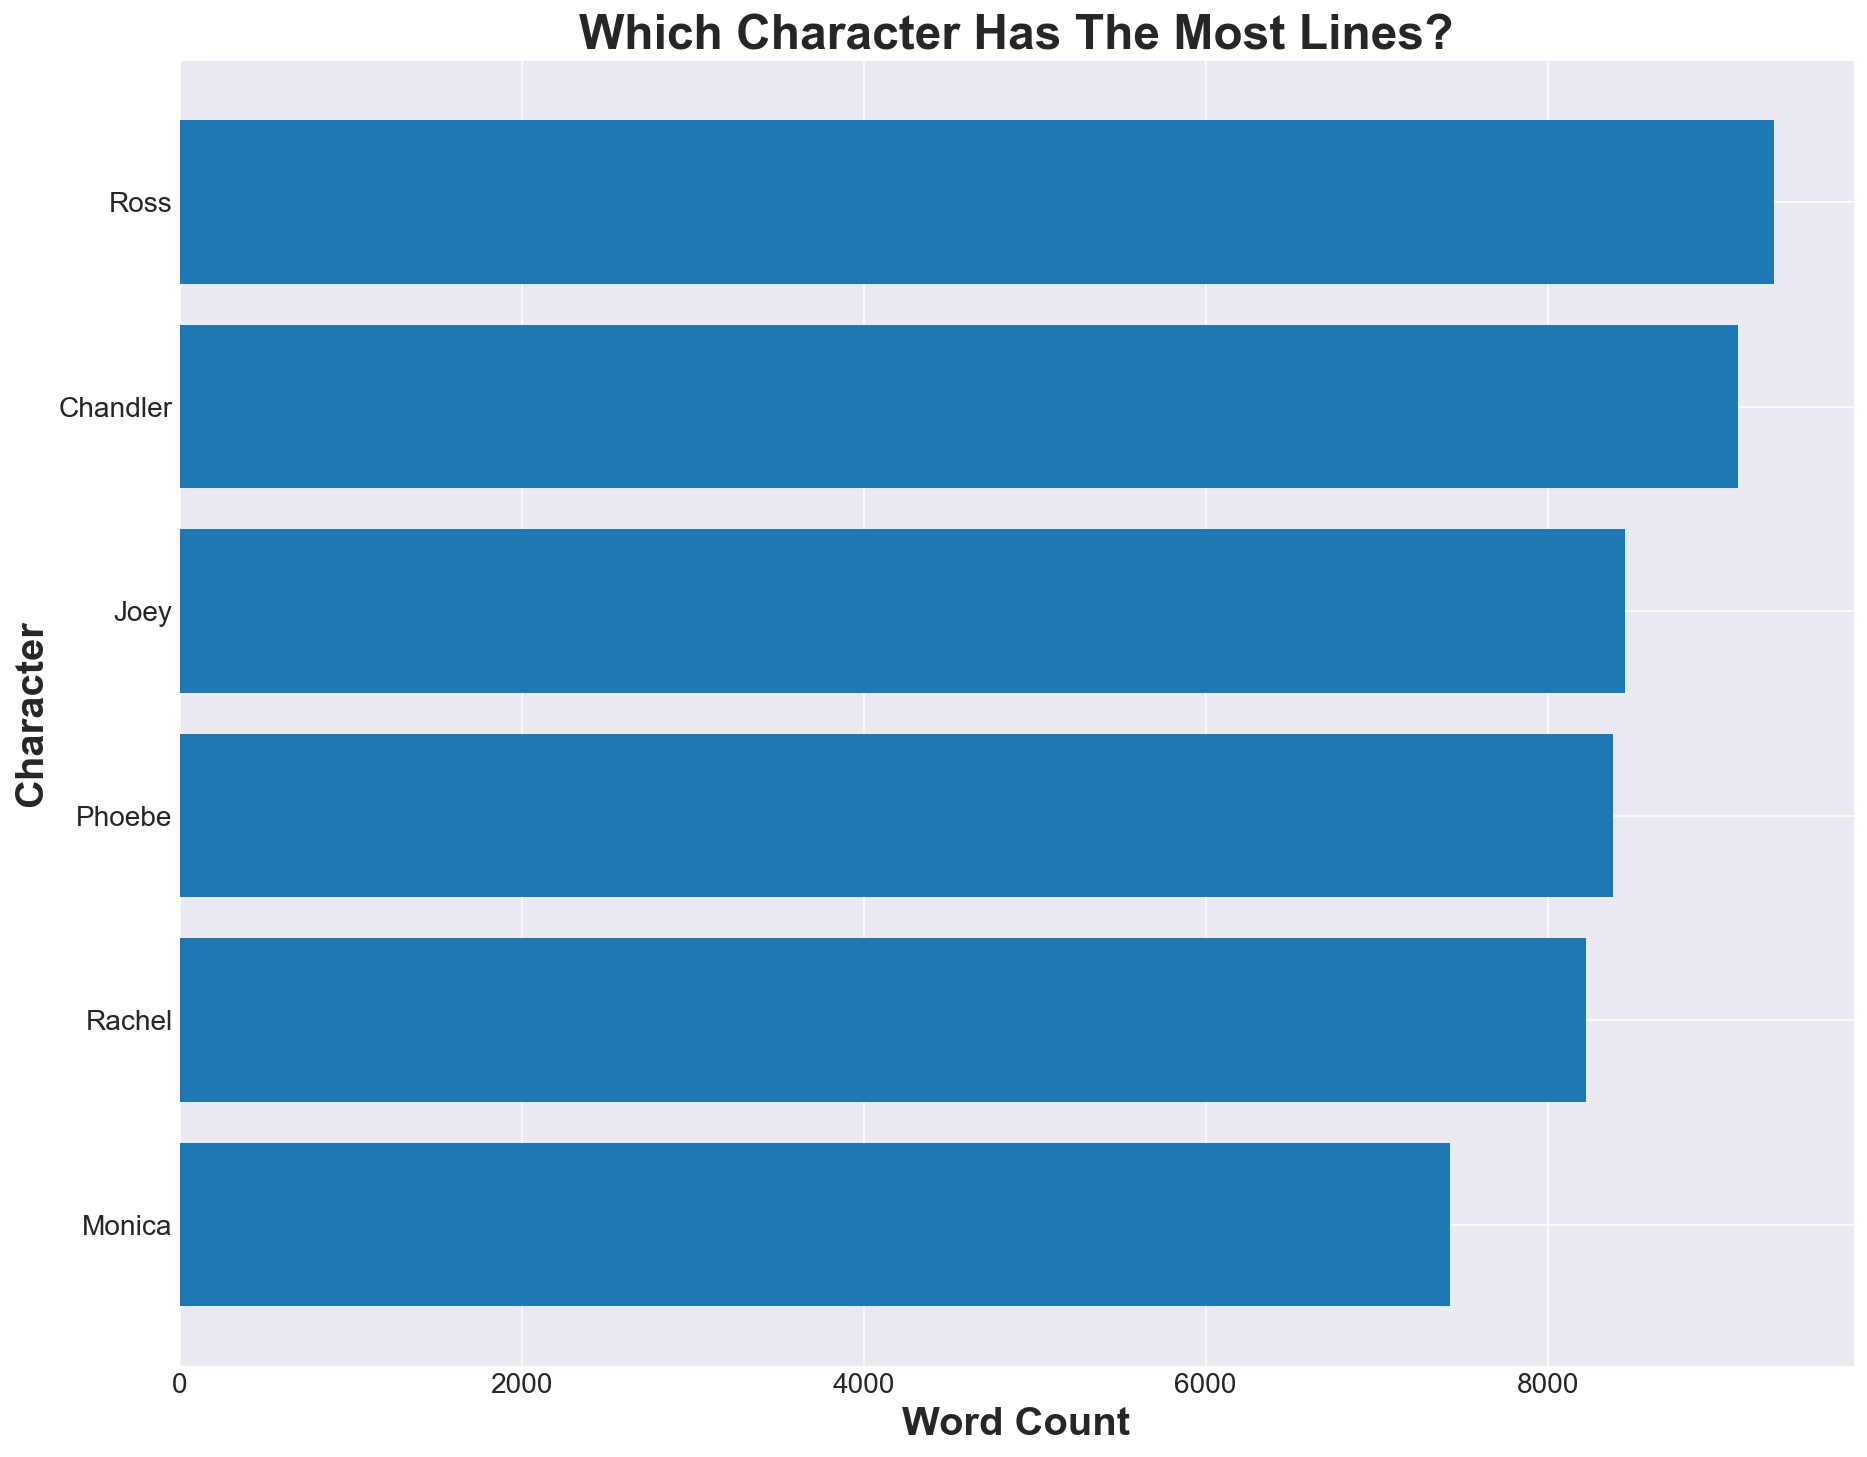

In [107]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

PLOT_STYLE = 'seaborn-darkgrid'

# limit the data to characters with most words
names = df_filtered['char'].unique().tolist()
word_count = df_filtered.groupby(['char'])['line'].count().sort_values(ascending=False).tolist()

plt.style.use(PLOT_STYLE)
fig, ax = plt.subplots(figsize=(15, 12))

y_pos = np.arange(len(names))

ax.barh(y_pos, word_count, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(names, size=14)
ax.tick_params(axis='x', labelsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Word Count', size=20, fontweight="bold")
ax.set_ylabel('Character', size=20, fontweight="bold")
ax.set_title('Which Character Has The Most Lines?', size=24, fontweight="bold", ha='center')
plt.show()

In [108]:
df.to_csv('./processedDF.csv')